# Imports

In [1]:
# import library data analisis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re # untuk mengganti data placeholder/invalid, awalnya diambil dari sentiment analysis, tapi sepertinya bisa dipakai disini juga

In [2]:
# pengaturan pandas supaya tidak pakai scientific notation
pd.set_option('display.float_format', '{:.6f}'.format)

In [3]:
# import library preprocess
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder # untuk data berurutan
from sklearn.impute import SimpleImputer # untuk imputasi data nantinya jika tidak di drop

In [4]:
# import library untuk model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [5]:
# import library untuk tuning
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [6]:
# import library konversi joblib
import joblib
from sklearn.preprocessing import FunctionTransformer # khusus log transformer yang hanya berupa rumus numpy

# Dataset Loading

Dataset source: https://www.kaggle.com/datasets/parisrohan/credit-score-classification

In [7]:
# load dataset training
df = pd.read_csv('train.csv')
df.head(50)

<ipython-input-7-05943749d1f9>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [8]:
# menghapus kolom kolom irelevan
df.drop(columns=['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN'], inplace=True)
df.head(50)

,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,1,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


Kolom tersebut irrelevan karena hanya identifikasi pengguna, bukan data aslinya

In [9]:
# menghapus kolom yang akan terlalu sulit untuk diproses
df.drop(columns=['Occupation', 'Type_of_Loan', 'Credit_History_Age', 'Payment_Behaviour'], inplace=True)
df.head(50)

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.000000,_,809.98,26.822620,No,49.574949,80.41529543900253,312.49408867943663,Good
1,19114.12,NaN,3,4,3,4,-1,NaN,11.27,4.000000,Good,809.98,31.944960,No,49.574949,118.28022162236736,284.62916249607184,Good
2,19114.12,NaN,3,4,3,4,3,7,_,4.000000,Good,809.98,28.609352,No,49.574949,81.699521264648,331.2098628537912,Good
3,19114.12,NaN,3,4,3,4,5,4,6.27,4.000000,Good,809.98,31.377862,No,49.574949,199.4580743910713,223.45130972736786,Good
4,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,4.000000,Good,809.98,24.797347,No,49.574949,41.420153086217326,341.48923103222177,Good
5,19114.12,NaN,3,4,3,4,8,4,9.27,4.000000,Good,809.98,27.262259,No,49.574949,62.430172331195294,340.4792117872438,Good
6,19114.12,1824.843333,3,4,3,4,3,8_,11.27,4.000000,Good,809.98,22.537593,No,49.574949,178.3440674122349,244.5653167062043,Good
7,19114.12,1824.843333,3,4,3,4,3,6,11.27,4.000000,Good,809.98,23.933795,No,49.574949,24.785216509052056,358.12416760938714,Standard
8,34847.84,3037.986667,2,4,6,1,3,4,5.42,2.000000,Good,605.03,24.464031,No,18.816215,104.291825168246,470.69062692529184,Standard
9,34847.84,3037.986667,2,4,6,1,7,1,7.42,2.000000,Good,605.03,38.550848,No,18.816215,40.39123782853101,484.5912142650067,Good


Kolom tersebut dihapus karena
- Terlalu banyak data unik (Occupation, 16 data unik yang berarti 16 kolom tambahan jika di one hot encode, dan label encode beresiko menggangu perhitungan model. Informasi didapat dari Kaggle)
- Sangat sulit dipisahkan dan dikategorikan (Type_of_Loan dan Payment_Behvaior)
- Tidak ada format jelas untuk konversi akurat (Credit_History_Age, tidak semua bulan itu 30 hari, dan tidak semua tahun itu 365 hari, jadi tidak bisa akurat jika dikonversi menjadi umur hitungan hari)

# EDA

## Memahami Struktur Data

In [10]:
# analisis struktur
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Annual_Income             100000 non-null  object 
 1   Monthly_Inhand_Salary     84998 non-null   float64
 2   Num_Bank_Accounts         100000 non-null  int64  
 3   Num_Credit_Card           100000 non-null  int64  
 4   Interest_Rate             100000 non-null  int64  
 5   Num_of_Loan               100000 non-null  object 
 6   Delay_from_due_date       100000 non-null  int64  
 7   Num_of_Delayed_Payment    92998 non-null   object 
 8   Changed_Credit_Limit      100000 non-null  object 
 9   Num_Credit_Inquiries      98035 non-null   float64
 10  Credit_Mix                100000 non-null  object 
 11  Outstanding_Debt          100000 non-null  object 
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Payment_of_Min_Amount     100000 non-null  ob

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.000000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.474430,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.057410,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.000000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.000000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.000000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.000000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


Beberapa kolom yang seharusnya numerikal disimpan sebagai string, jadi kemungkinan ada karakter non-angka yang harus dihapus sebelum di convert. Kolom kolom tersebut itu
- Annual_Income
- Num_of_Loan
- Num_of_Delayed_Payment
- Changed_Credit_Limit
- Outstanding_Debt
- Amount_invested_monthly
- Monthly_Balance

In [11]:
# mempersiapkan list untuk kolom yang perlu dihapus karakter selain angka
numeric_but_string = ['Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']

In [12]:
# membuat dictionary untuk menyimpan data bukan numerik
dict_not_numeric = {}

In [13]:
# membuat sebuah loop untuk mengecek data yang mengandung karakter selain angka tersebut
for col in numeric_but_string:
  df[col] = df[col].dropna() # awalnya error karena masih ada row NaN, jadi pertama harus didrop sementara
  df[col] = df[col].astype(str)
  data = df[col].str.replace(r'[.,-]', '', regex=True) # menghapus sementara tanda desimal (. dan ,) dan tanda negatif
  # catatan, re.sub tidak bisa dipakai karena error tidak kompatibel dengan pandas
  data = data.unique() # ambil saja 1 dari semua data yang sama

  not_numeric = [] # membuat list satu lagi untuk menyimpan setiap data
  for val in data:
    if not val.isdigit(): # cek jika setelah simbol tadi dihapus, apakah yang tersisa hanya angka atau tidak
      not_numeric.append(val) # jika tidak maka akan masuk ke list not_numeric

  # membuat dictionary dari list yang menyimpan kolom dan data di kolom itu
  if not_numeric:
    dict_not_numeric[col] = not_numeric

Cell selanjutnya ini ternyata menghasilkan BANYAK baris, jadi jangan dibuka output nya kecuali benar benar mau dianalisis

In [14]:
# melihat list data tidak numerik
dict_not_numeric

{'Annual_Income': ['3484784_',
  '3068989_',
  '3554771_',
  '3408138_',
  '11483841_',
  '8864024_',
  '5439216_',
  '8701545_',
  '2554626_',
  '9204708_',
  '9779142_',
  '10183015_',
  '10673313_',
  '12600445_',
  '5798312_',
  '3429012_',
  '4307024_',
  '65159900_',
  '3964154_',
  '2946998_',
  '1556602_',
  '2057447_',
  '14869932_',
  '1416523_',
  '8184228_',
  '12373232_',
  '7898848_',
  '4174676_',
  '7373736_',
  '7527324_',
  '5482089_',
  '5867466_',
  '3039044_',
  '14454672_',
  '3034635_',
  '7233098_',
  '4324149_',
  '1778734_',
  '13497824_',
  '1484135_',
  '661054_',
  '2707007_',
  '17992775_',
  '1830525_',
  '1420509_',
  '4375834_',
  '14488168_',
  '13432144_',
  '5680371_',
  '6652824_',
  '19403405_',
  '89089980_',
  '150154_',
  '1977705_',
  '5515104_',
  '3053662_',
  '1979552_',
  '1871702_',
  '2779642_',
  '13287272_',
  '4173555_',
  '4039166_',
  '7441295_',
  '2458555_',
  '1501373_',
  '3421201_',
  '2419924_',
  '2858729_',
  '16578115_',
  '

Dilihat dari list tadi, kebanyakan data tersebut itu hanya angka angka valid tapi ada underscore (_) yang mengikuti mereka. Tapi beberapa kolom seperti

- Changed_Credit_Limit
- Amount_invested_monthly
- Monthly_balance

sepertinya memiliki data placeholder, jadi untuk mereka bisa di ganti dengan nilai NaN sebelum data valid dibersihkan

In [15]:
# menghapus data placeholder di 3 kolom tadi
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].str.replace('_', '')
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace('__10000__', '')
df['Monthly_Balance'] = df['Monthly_Balance'].str.replace('__333333333333333333333333333__', '')

In [16]:
# membersihkan kolom kolom tadi
for col in numeric_but_string:
  df[col] = df[col].astype(str)
  df[col] = df[col].str.replace(r'(\d+)_$', r'\1', regex=True) # pertama harus hapus _ yang hanya di paling belakang, jadi data placeholder tidak dihapus _ nya
  df[col] = df[col].replace('', np.nan) # mengubah data kosong, jika ada, menjadi NaN
  # catatan, ternyata tidak bisa langsung diganti NaN karena bukan string, jadi harus buat baris baru
  df[col] = pd.to_numeric(df[col], errors='coerce')

In [17]:
# melihat hasil perubahan struktur data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Annual_Income             100000 non-null  float64
 1   Monthly_Inhand_Salary     84998 non-null   float64
 2   Num_Bank_Accounts         100000 non-null  int64  
 3   Num_Credit_Card           100000 non-null  int64  
 4   Interest_Rate             100000 non-null  int64  
 5   Num_of_Loan               100000 non-null  int64  
 6   Delay_from_due_date       100000 non-null  int64  
 7   Num_of_Delayed_Payment    92998 non-null   float64
 8   Changed_Credit_Limit      97909 non-null   float64
 9   Num_Credit_Inquiries      98035 non-null   float64
 10  Credit_Mix                100000 non-null  object 
 11  Outstanding_Debt          100000 non-null  float64
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Payment_of_Min_Amount     100000 non-null  ob

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,84998.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,92998.000000,97909.000000,98035.000000,100000.000000,100000.000000,100000.000000,91216.000000,98791.000000
mean,176415.701298,4194.170850,17.091280,22.474430,72.466040,3.009960,21.068780,30.923342,10.389025,27.754251,1426.220376,32.285173,1403.118217,195.539456,402.551258
std,1429618.051414,3183.686167,117.404834,129.057410,466.422621,62.647879,14.860104,226.031892,6.789496,193.177339,1155.129026,5.116875,8306.041270,199.564527,213.925499
min,7005.930000,303.645417,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760
25%,19457.500000,1625.568229,3.000000,4.000000,8.000000,1.000000,10.000000,9.000000,5.320000,3.000000,566.072500,28.052567,30.306660,72.236692,270.106630
50%,37578.610000,3093.745000,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.155000,32.305784,69.249473,128.954538,336.731225
75%,72790.920000,5957.448333,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.870000,9.000000,1945.962500,36.496663,161.224249,236.815814,470.262938
max,24198062.000000,15204.633333,1798.000000,1499.000000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,1977.326102,1602.040519


In [18]:
# lihat hasil pt2
df.head(50)

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,19114.120000,1824.843333,3,4,3,4,3,7.000000,11.270000,4.000000,_,809.980000,26.822620,No,49.574949,80.415295,312.494089,Good
1,19114.120000,NaN,3,4,3,4,-1,NaN,11.270000,4.000000,Good,809.980000,31.944960,No,49.574949,118.280222,284.629162,Good
2,19114.120000,NaN,3,4,3,4,3,7.000000,NaN,4.000000,Good,809.980000,28.609352,No,49.574949,81.699521,331.209863,Good
3,19114.120000,NaN,3,4,3,4,5,4.000000,6.270000,4.000000,Good,809.980000,31.377862,No,49.574949,199.458074,223.451310,Good
4,19114.120000,1824.843333,3,4,3,4,6,NaN,11.270000,4.000000,Good,809.980000,24.797347,No,49.574949,41.420153,341.489231,Good
5,19114.120000,NaN,3,4,3,4,8,4.000000,9.270000,4.000000,Good,809.980000,27.262259,No,49.574949,62.430172,340.479212,Good
6,19114.120000,1824.843333,3,4,3,4,3,8.000000,11.270000,4.000000,Good,809.980000,22.537593,No,49.574949,178.344067,244.565317,Good
7,19114.120000,1824.843333,3,4,3,4,3,6.000000,11.270000,4.000000,Good,809.980000,23.933795,No,49.574949,24.785217,358.124168,Standard
8,34847.840000,3037.986667,2,4,6,1,3,4.000000,5.420000,2.000000,Good,605.030000,24.464031,No,18.816215,104.291825,470.690627,Standard
9,34847.840000,3037.986667,2,4,6,1,7,1.000000,7.420000,2.000000,Good,605.030000,38.550848,No,18.816215,40.391238,484.591214,Good


## Visualisasi data

In [19]:
# membuat fungsi visualisasi data untuk histplot dan boxplot
def visualisasi_hist_box(df, cols):
  for col in cols:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Hist plot
    axes[0].hist(df[col], bins=50, edgecolor='black')
    axes[0].set_title(f'Hist plot {col}')

    # Box plot
    axes[1].boxplot(df[col])
    axes[1].set_title(f'Box plot {col}')

    plt.show()

In [20]:
# fungsi visualiasi tapi bar chart
def visualisasi_bar(df, cols):
  for col in cols:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar chart {col}')

In [21]:
# mengambil semua kolom numerik
numeric = df.select_dtypes(include=['number']).columns
numeric

Index(['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

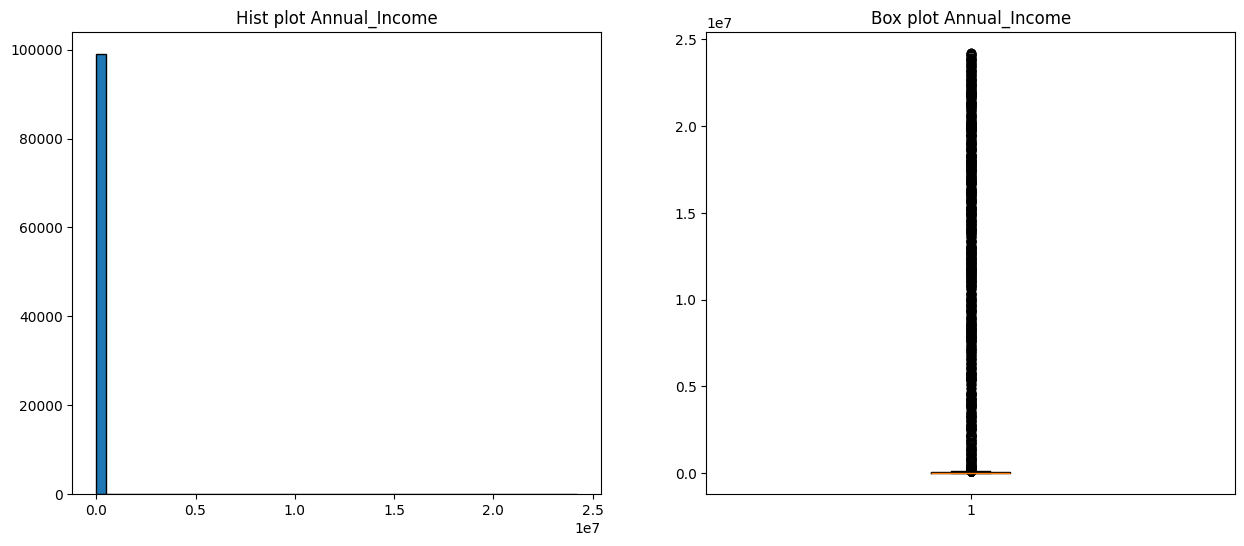

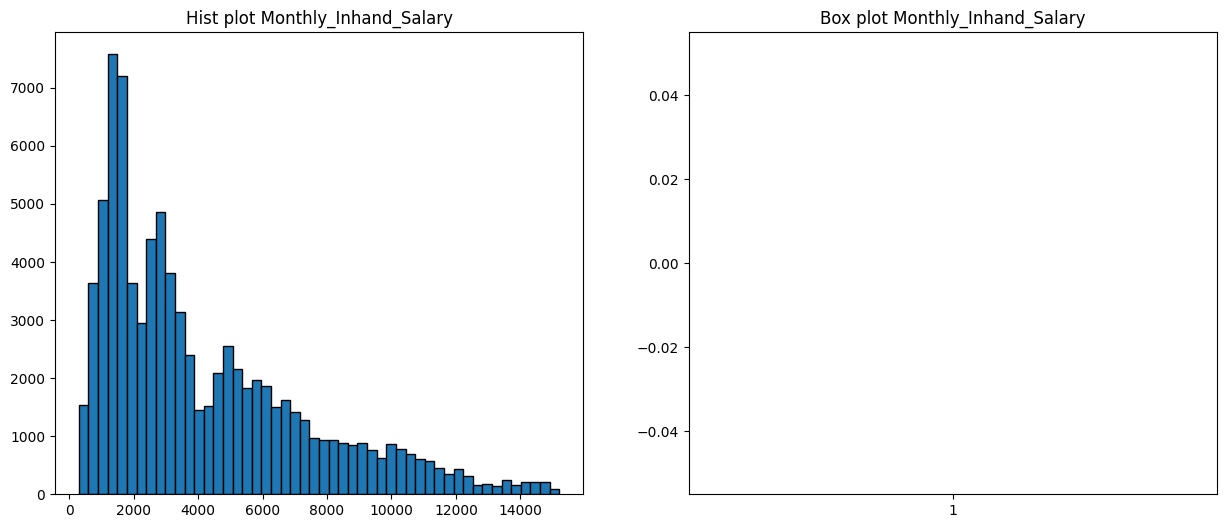

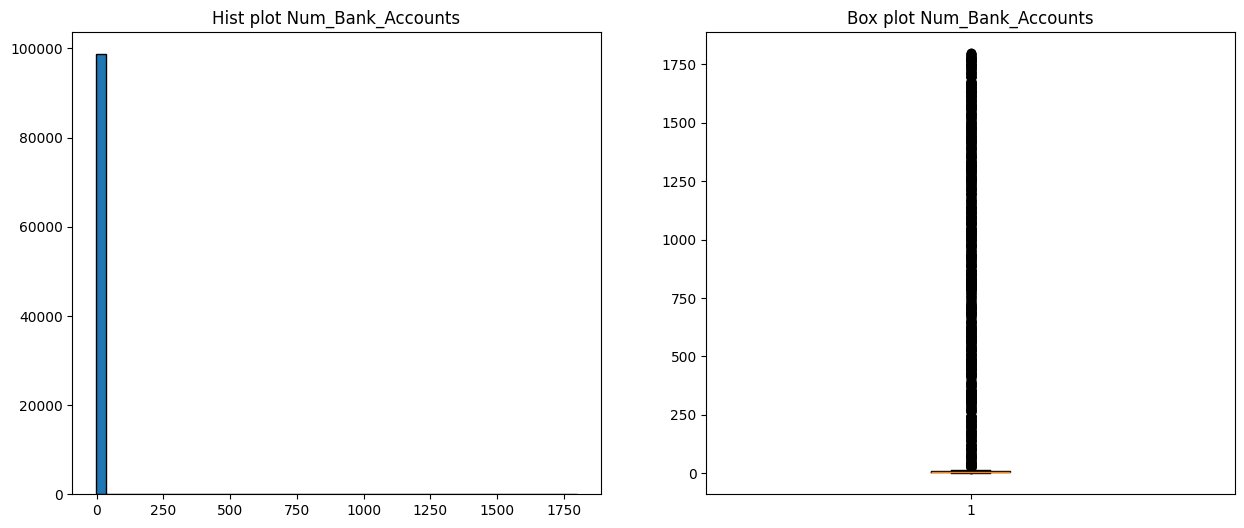

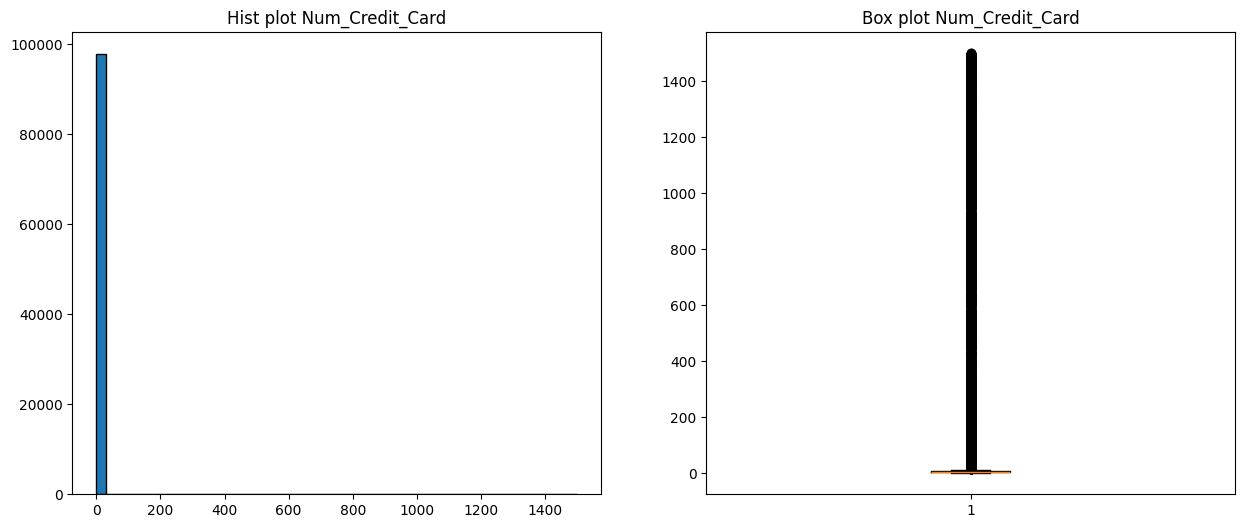

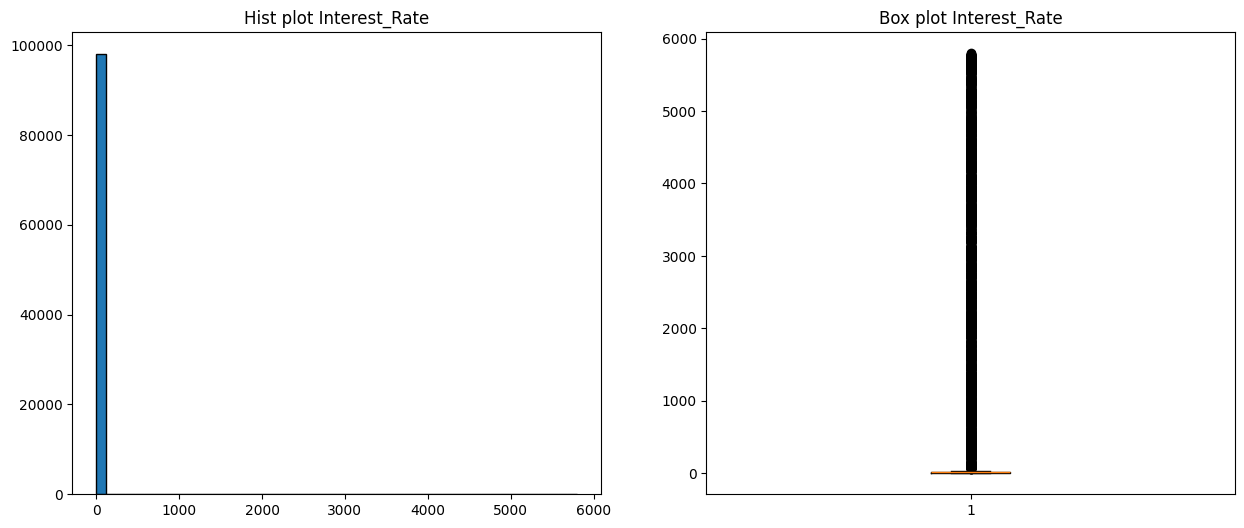

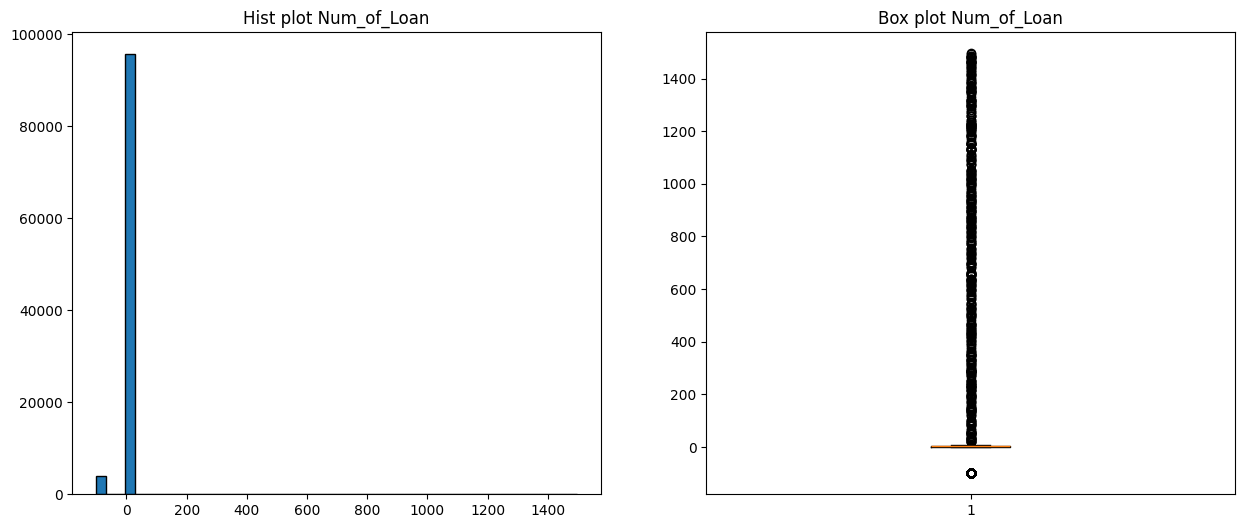

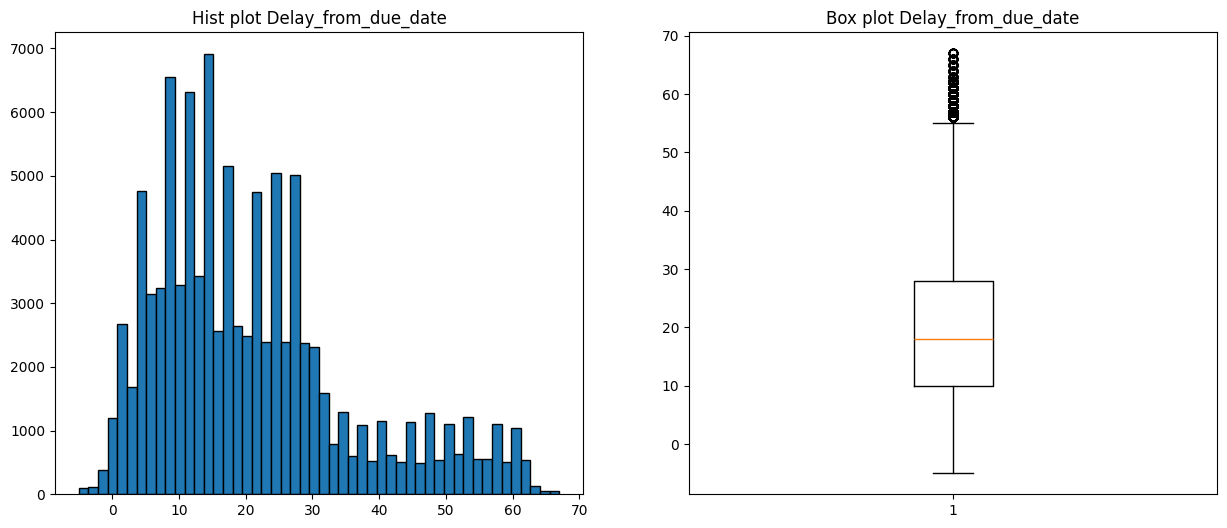

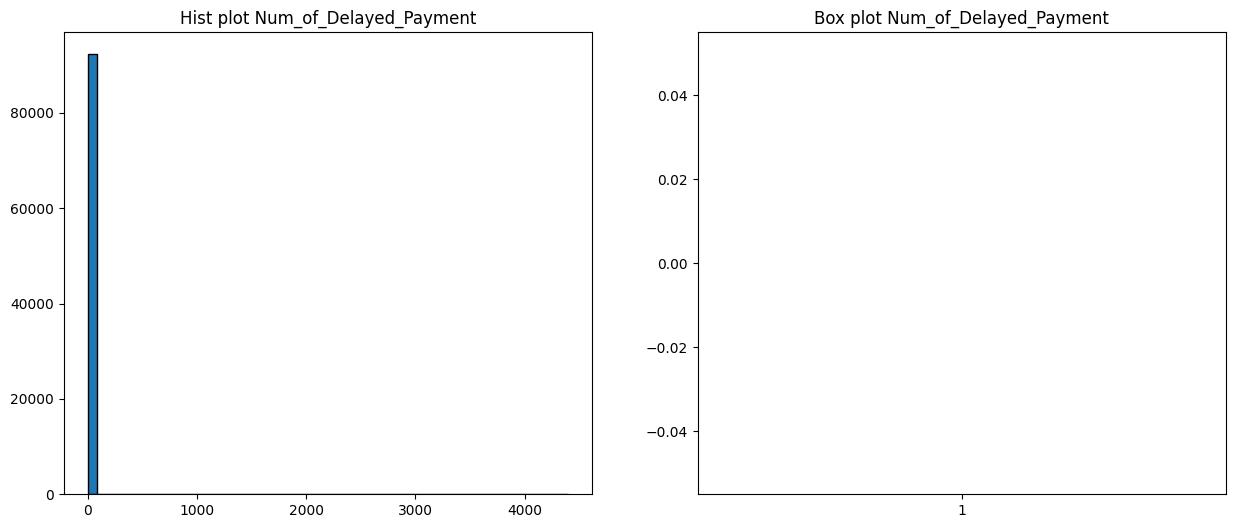

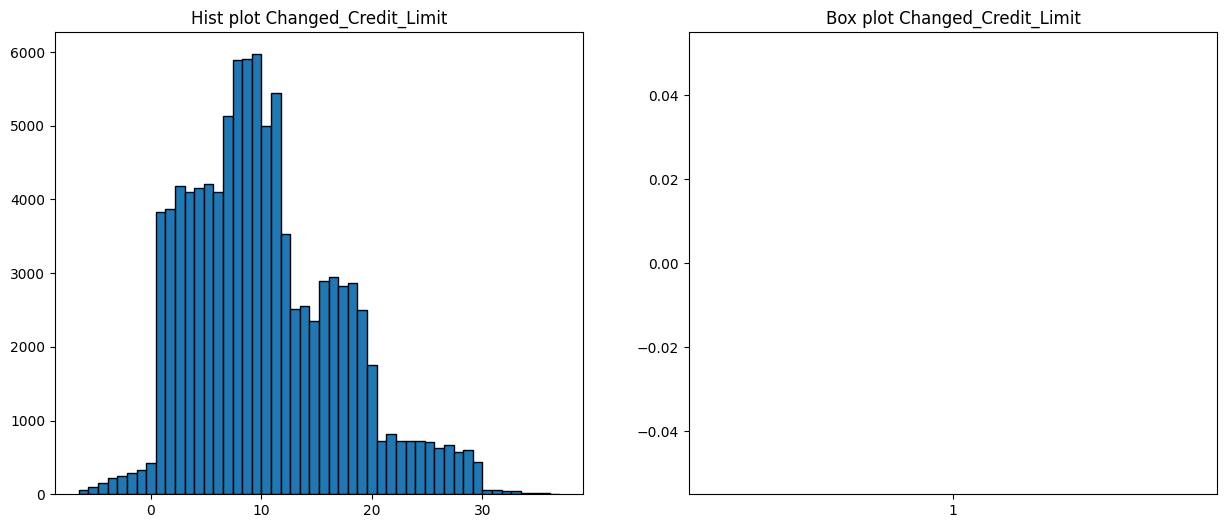

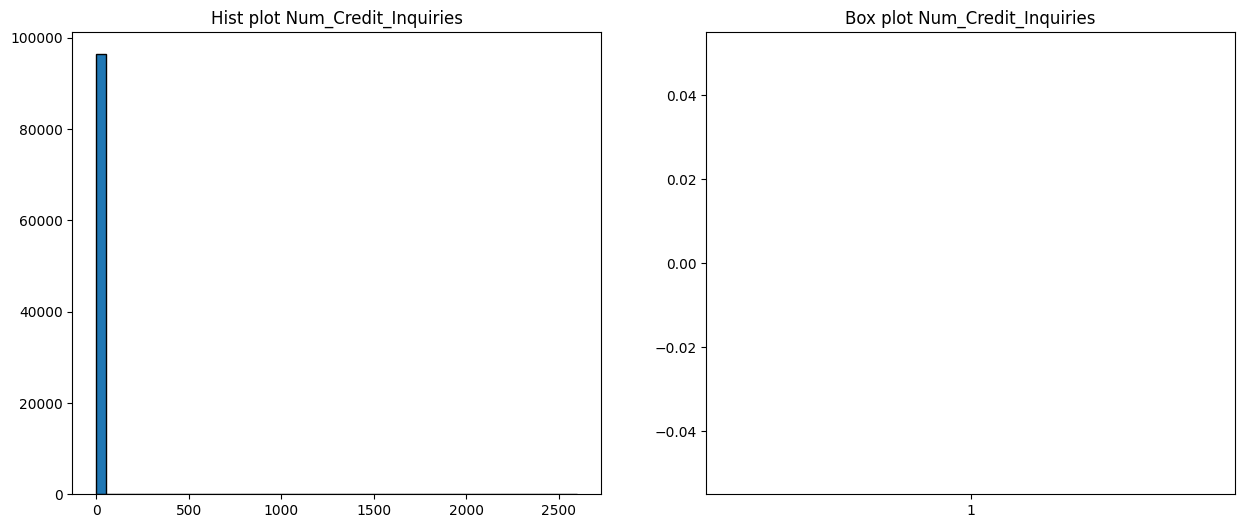

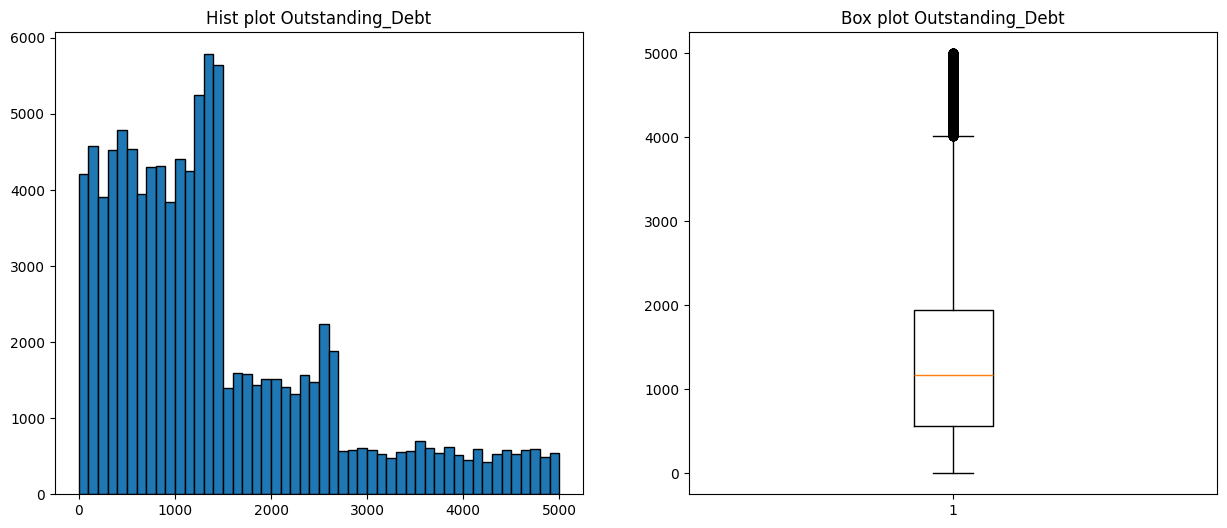

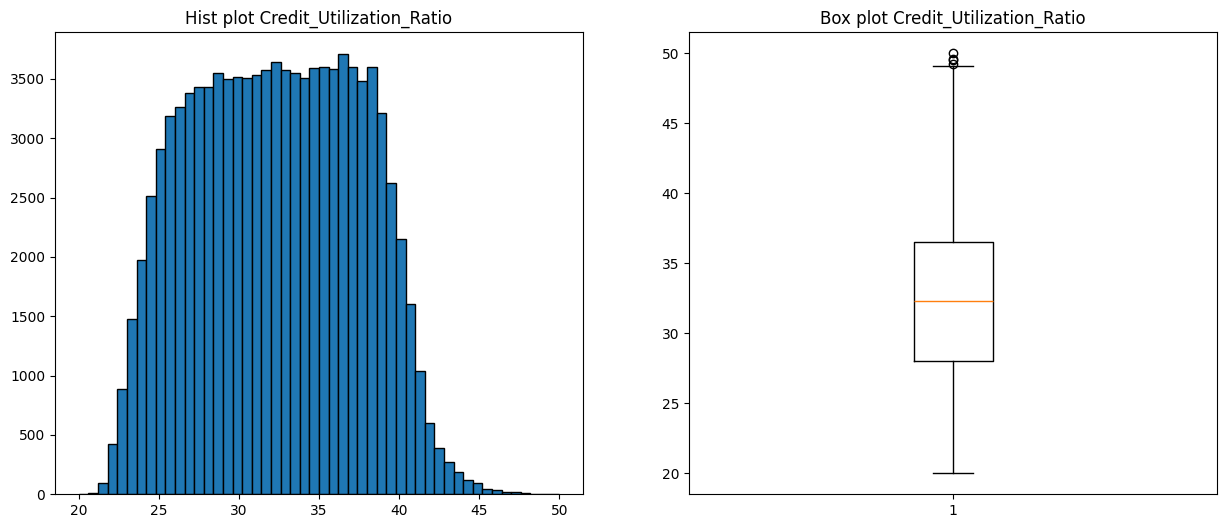

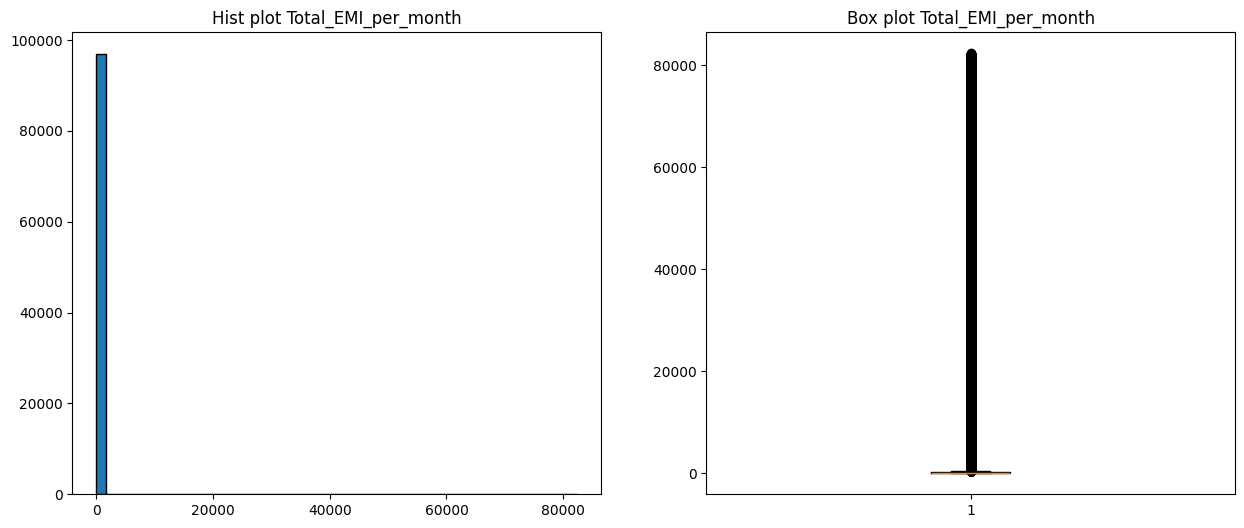

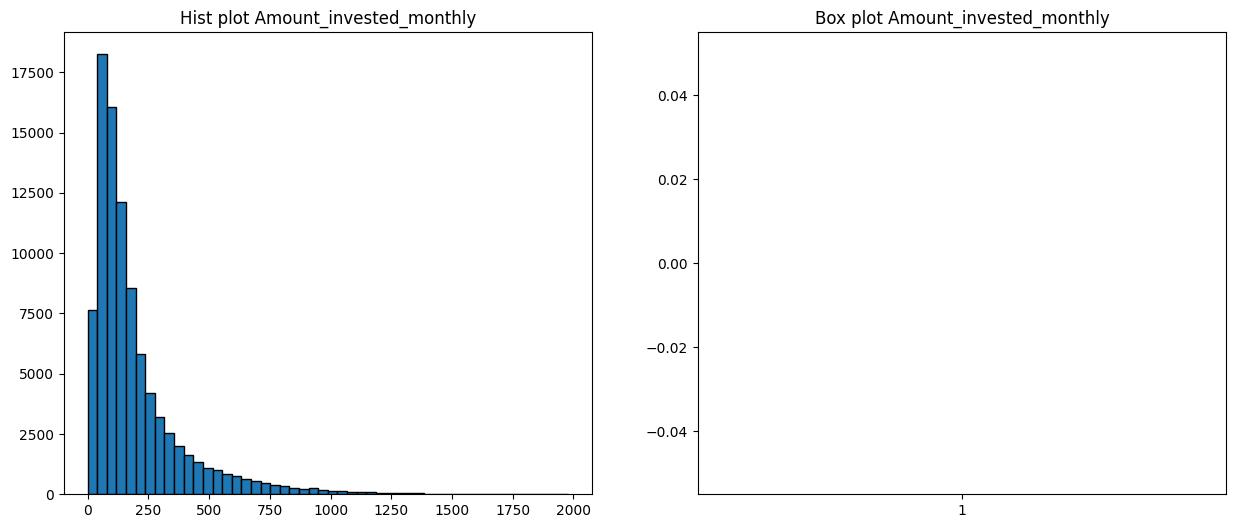

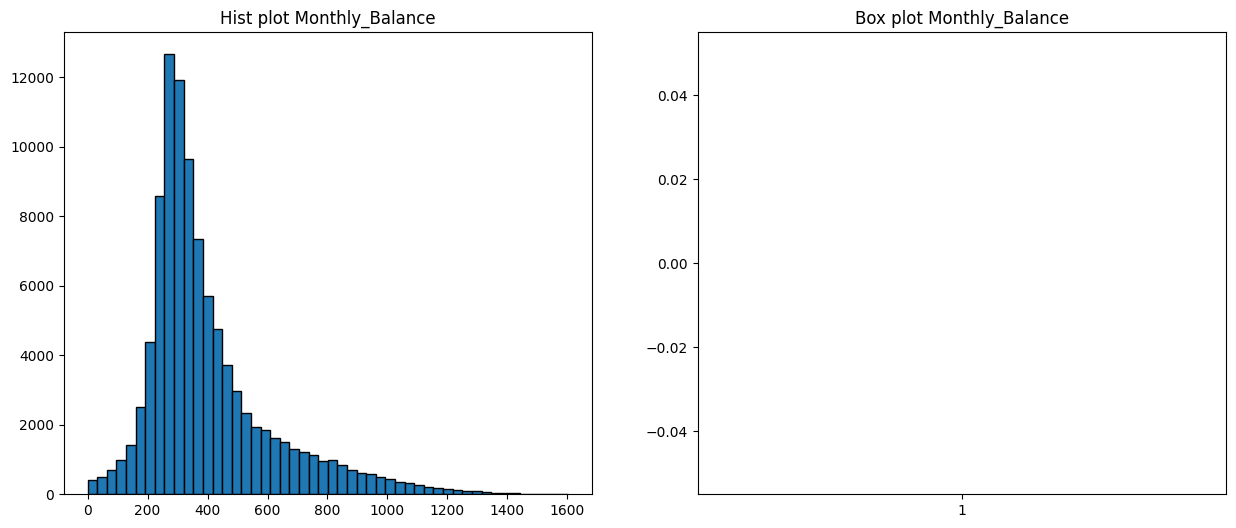

In [22]:
# membuat hist plot dan box plot untuk setiap kolom tersebut
visualisasi_hist_box(df, numeric)

In [23]:
#  mengambil semua kolom kategori
category = df.select_dtypes(include=['object']).columns

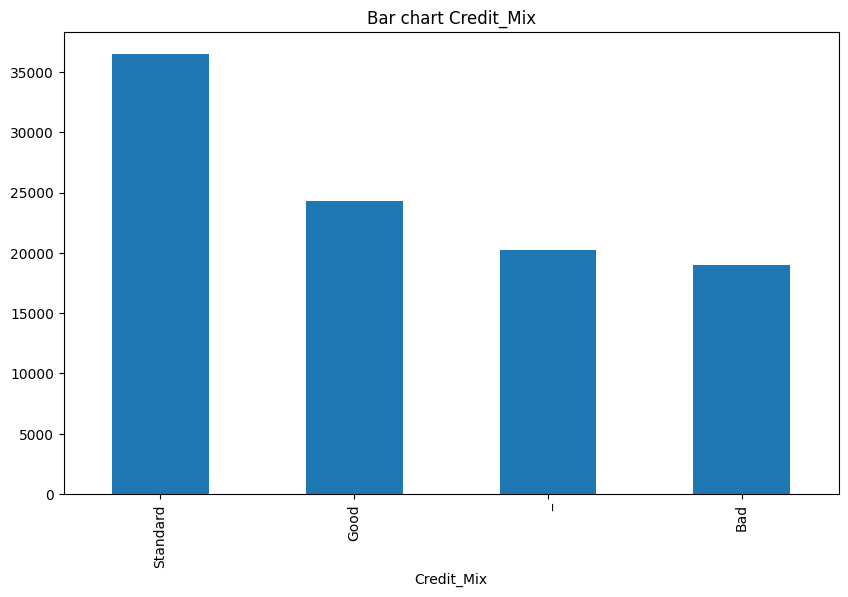

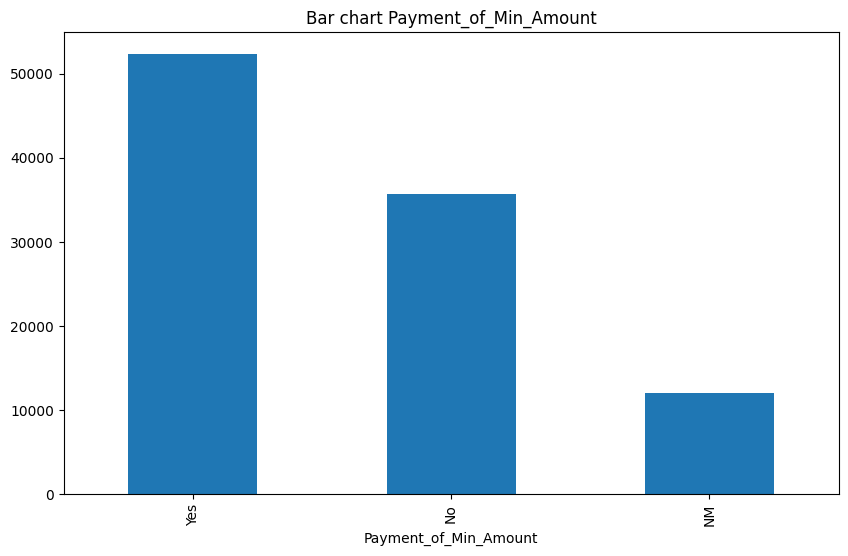

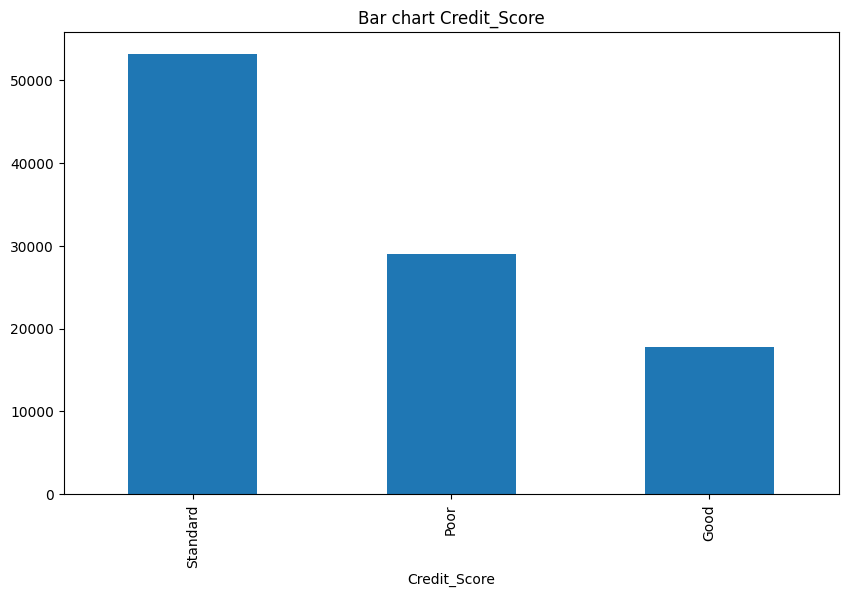

In [24]:
# membuat bar chart untuk kolom kategorikal
visualisasi_bar(df, category)

Ternyata ada value placeholder (_ di Credit_Mix) dan tidak jelas (NM di Payment_of_Min_Amount). Saya memutuskan kedua value itu harus di imputasi menjadi value paling banyak

In [25]:
# ganti _ menjadi nan
df['Credit_Mix'].replace('_', np.nan, inplace=True)

<ipython-input-25-5f5c65979bdb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_Mix'].replace('_', np.nan, inplace=True)


In [26]:
# isi pakai mode/value paling banyak
df['Credit_Mix'].fillna(df['Credit_Mix'].mode()[0], inplace=True)

<ipython-input-26-52cee1723fc1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_Mix'].fillna(df['Credit_Mix'].mode()[0], inplace=True)


In [27]:
# lakukan kurang lebih yang sama tapi untuk Payment
df['Payment_of_Min_Amount'].replace('NM', np.nan, inplace=True)
df['Payment_of_Min_Amount'].fillna(df['Payment_of_Min_Amount'].mode()[0], inplace=True)

<ipython-input-27-0cee79831f74>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Payment_of_Min_Amount'].replace('NM', np.nan, inplace=True)
<ipython-input-27-0cee79831f74>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

# Preprocessing

## Menangani data hilang

In [28]:
# cek data NaN, seharusnya banyak karena penghapusan data placeholder
df.isnull().sum()

,0
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,7002
Changed_Credit_Limit,2091
Num_Credit_Inquiries,1965


In [29]:
# imputasi data untuk kolom nukerik, pakai median
imputer = SimpleImputer(strategy='median')
df[numeric] = imputer.fit_transform(df[numeric])

In [30]:
df.isnull().sum()

,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0
Num_Credit_Inquiries,0


In [31]:
# lihat hasil imputasi
df.head(50)

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,19114.120000,1824.843333,3.000000,4.000000,3.000000,4.000000,3.000000,7.000000,11.270000,4.000000,Standard,809.980000,26.822620,No,49.574949,80.415295,312.494089,Good
1,19114.120000,3093.745000,3.000000,4.000000,3.000000,4.000000,-1.000000,14.000000,11.270000,4.000000,Good,809.980000,31.944960,No,49.574949,118.280222,284.629162,Good
2,19114.120000,3093.745000,3.000000,4.000000,3.000000,4.000000,3.000000,7.000000,9.400000,4.000000,Good,809.980000,28.609352,No,49.574949,81.699521,331.209863,Good
3,19114.120000,3093.745000,3.000000,4.000000,3.000000,4.000000,5.000000,4.000000,6.270000,4.000000,Good,809.980000,31.377862,No,49.574949,199.458074,223.451310,Good
4,19114.120000,1824.843333,3.000000,4.000000,3.000000,4.000000,6.000000,14.000000,11.270000,4.000000,Good,809.980000,24.797347,No,49.574949,41.420153,341.489231,Good
5,19114.120000,3093.745000,3.000000,4.000000,3.000000,4.000000,8.000000,4.000000,9.270000,4.000000,Good,809.980000,27.262259,No,49.574949,62.430172,340.479212,Good
6,19114.120000,1824.843333,3.000000,4.000000,3.000000,4.000000,3.000000,8.000000,11.270000,4.000000,Good,809.980000,22.537593,No,49.574949,178.344067,244.565317,Good
7,19114.120000,1824.843333,3.000000,4.000000,3.000000,4.000000,3.000000,6.000000,11.270000,4.000000,Good,809.980000,23.933795,No,49.574949,24.785217,358.124168,Standard
8,34847.840000,3037.986667,2.000000,4.000000,6.000000,1.000000,3.000000,4.000000,5.420000,2.000000,Good,605.030000,24.464031,No,18.816215,104.291825,470.690627,Standard
9,34847.840000,3037.986667,2.000000,4.000000,6.000000,1.000000,7.000000,1.000000,7.420000,2.000000,Good,605.030000,38.550848,No,18.816215,40.391238,484.591214,Good


In [32]:
# pt2
df.describe()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,176415.701298,4029.084964,17.091280,22.474430,72.466040,3.009960,21.068780,29.738370,10.368345,27.326780,1426.220376,32.285173,1403.118217,189.690637,401.755494
std,1429618.051414,2961.363540,117.404834,129.057410,466.422621,62.647879,14.860104,218.017612,6.719627,191.293766,1155.129026,5.116875,8306.041270,191.527772,212.750017
min,7005.930000,303.645417,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760
25%,19457.500000,1792.084167,3.000000,4.000000,8.000000,1.000000,10.000000,9.000000,5.420000,3.000000,566.072500,28.052567,30.306660,77.017414,270.913865
50%,37578.610000,3093.745000,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.155000,32.305784,69.249473,128.954538,336.731225
75%,72790.920000,5371.525000,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.660000,9.000000,1945.962500,36.496663,161.224249,220.039055,467.670597
max,24198062.000000,15204.633333,1798.000000,1499.000000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,1977.326102,1602.040519


## Menghapus data duplikat

In [33]:
df.drop_duplicates(inplace=True)

## Dataset Splitting

In [34]:
# split antara label dan feature
X = df.drop(columns=['Credit_Score'])
y = df['Credit_Score'].values.ravel()

In [35]:
# split menjadi training dan validasi
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

## Penanganan Outlier

Melihat dari hasil .describe beberapa kali daritadi, saya menentukan untuk outlier ada beberapa yang bisa menggunakan IQR, ada beberapa yang lebih baik menggunakan log transform, dan ada beberapa kolom yang tidak memiliki outlier

- IQR:
  - Num_Bank_Accounts, karena outlier disini bisa dipangkas/di ubah ke nilai maksimal IQR
  - Num_Credit_Card, sama seperti di atas, jenis datanya kemungkinan besar hanya karena eror
  - Interest_Rate, nilai max jauh lebih tinggi, tapi seharusnya bunga (interest) itu tidak setinggi itu (5000%???), jadi bisa saja karena eror
  - Num_of_Loan, ada nilai negatif, harusnya tidak ada
  - Delay_from_due_date, juga ada nilai negatif, dan juga outlier masih masuk akal
  - Num_of_Delayed_Payment, sama seperti yang atas tapi jauh lebih ekstrim dengan outlier yang tidak masuk akal
  - Num_Credit_Inquiries, nilai maks terlalu tinggi, kemungkinan hanya eror
- Log transform
  - Annual_Income, variance data sangat besar dengan nilai max yang jauh lebih besar daripada bahkan titik 75%, tapi bisa saja masuk akal di dunia nyata karena orang kaya memang memperoleh jauh lebih banyak, jadi outlier dianggap penting
  - Monthly_Inhand_Salary → sama dengan di atas
  - Outstanding_Debt → di dunia nyata, orang bisa terlilit hutang besar, jadi kemungkinan outlier disini penting
  - Total_EMI_per_month, nilai maks sangat besar, tapi bisa jadi valid karena EMI itu bayaran per bulan untuk membayar utang kredit, bisa saja besar sekali
  - Amount_invested_monthly, sama seperti Annual_income, orang kaya bisa jadi investasi sangat besar
  - Monthly_Balance → sama dengan Annual_Income, orang kaya bisa punya lebih banyak uang cash sisa setiap bulan nya

sisanya tidak perlu penanganan outlier karena nilai nilainya sudah masuk akal

In [36]:
# membuat variabel untuk kolom yang akan diterapkan IQR filtering
outlier_iqr = ['Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries']

In [37]:
# fungsi untuk menentukan iqr setiap kolom, dibuat menjadi fungsi karena saya tidak mau mengulang
def get_iqr(df, cols): # parameter cols supaya nanti bisa hanya ganti variabel untuk feature selection
  for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col] = np.clip(df[col], lower_bound, upper_bound) # pakai clip supaya data hanya dijadikan ke titik maks, bukan dihapus
  return df

In [38]:
# pakai fungsi tadi untuk dataset masing masing
X_train = get_iqr(X_train, outlier_iqr)
X_val = get_iqr(X_val, outlier_iqr)

In [39]:
# variabel tapi untuk log transform
outlier_log = ['Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

In [40]:
# fungsi menerapkan log transform, juga karena tidak mau mengulang 2x
def log_transform(df, cols):
  for col in cols:
    df[col] = np.log1p(df[col])
  return df

In [41]:
# pakai fungsi tadi untuk dataset
X_train = log_transform(X_train, outlier_log)
X_val = log_transform(X_val, outlier_log)

## Encoding

In [42]:
# siapkan encoder credit mix
credit_mix_encode = OrdinalEncoder(categories=[['Bad', 'Standard', 'Good']])

In [43]:
# ubah nilai kategori credit mix
X_train['Credit_Mix'] = credit_mix_encode.fit_transform(X_train[['Credit_Mix']]) # encoder perlu data 2D, jadi harus 2x [[]]
X_val['Credit_Mix'] = credit_mix_encode.transform(X_val[['Credit_Mix']])

In [44]:
# sama untuk payment of minimum
payment_encode = LabelEncoder()
X_train['Payment_of_Min_Amount'] = payment_encode.fit_transform(X_train['Payment_of_Min_Amount']) # label encoder tidak perlu 2D
X_val['Payment_of_Min_Amount'] = payment_encode.transform(X_val['Payment_of_Min_Amount'])

In [45]:
# encoder untuk label
credit_score_encode = LabelEncoder()
y_train = credit_score_encode.fit_transform(y_train)
y_val = credit_score_encode.transform(y_val)

## Normalisasi/Standardisasi

Standardisasi dipilih. Kenapa? Dataset tidak ada range yang tertentu untuk minmax. Juga, sebelumnya saya menggunakan bareng log transform dan standardisasi (lihat submission akhir Belajar Machine Learning untuk Pemula edwardnicholaswijaya)

In [46]:
# membuat standard scaler
standardisasi = StandardScaler()

In [47]:
# buat copy dari dataframe
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()

In [48]:
# diterapkan ke dataset hanya untuk kolom numeric
X_train_scaled[numeric] = standardisasi.fit_transform(X_train[numeric])
X_val_scaled[numeric] = standardisasi.transform(X_val[numeric])

## Visualisasi data setelah transforamsi

In [49]:
# ubah menjadi dataframe supaya bisa di looping dengan nama kolom
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val.columns)

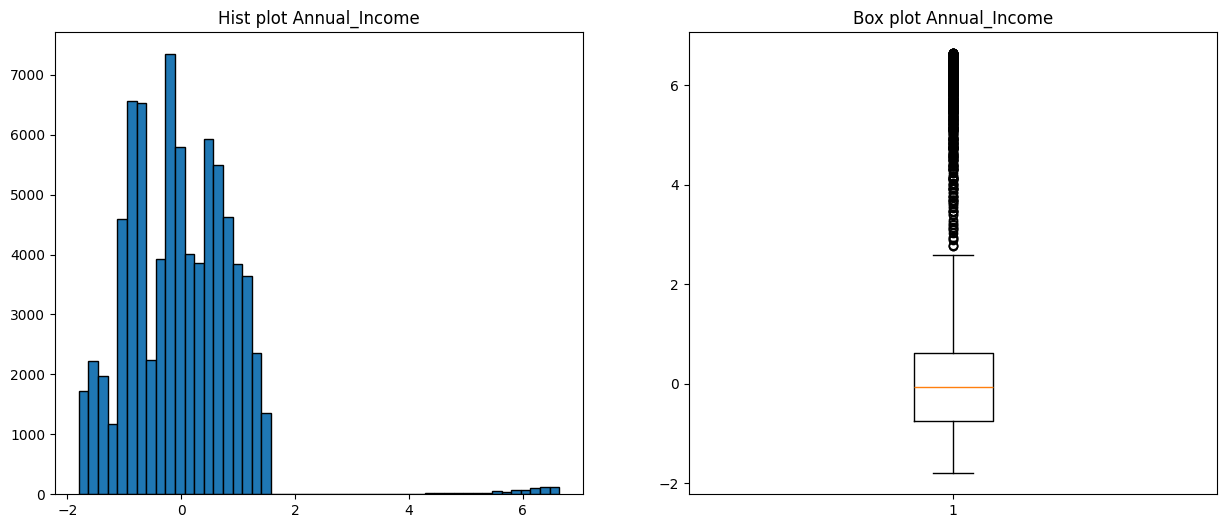

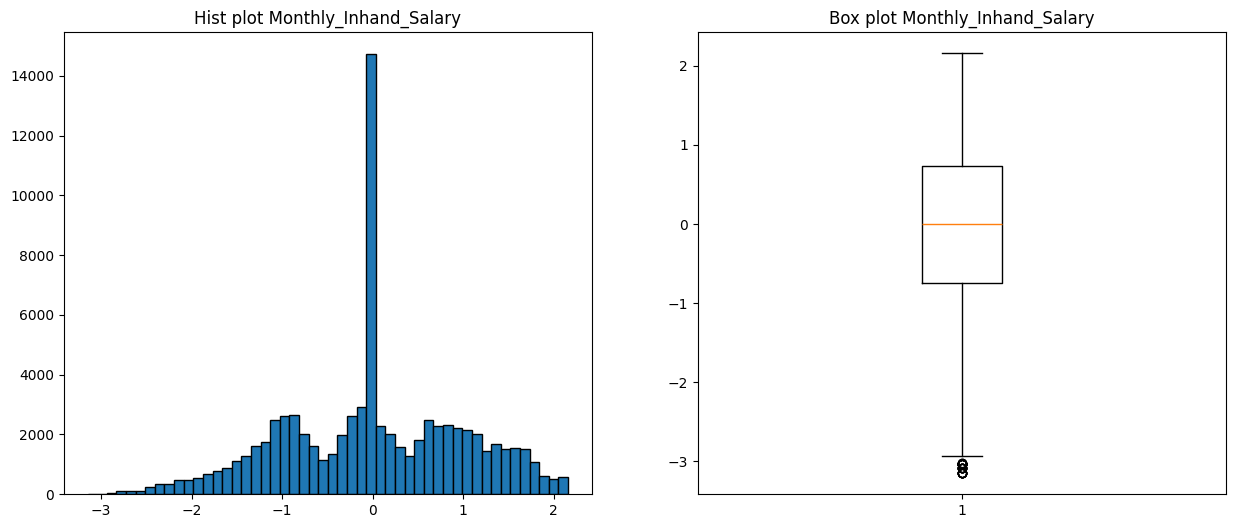

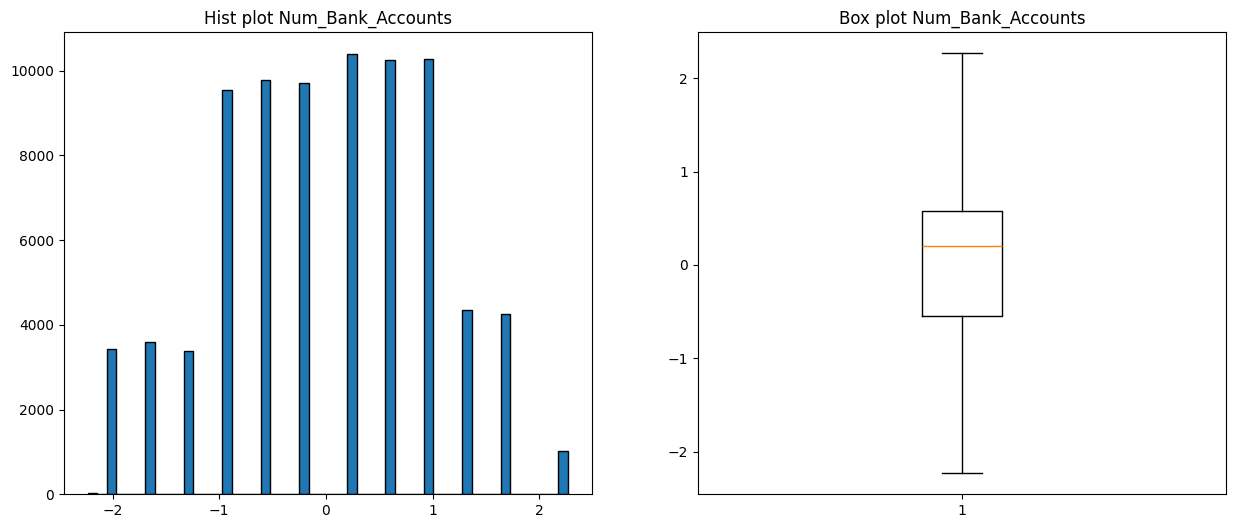

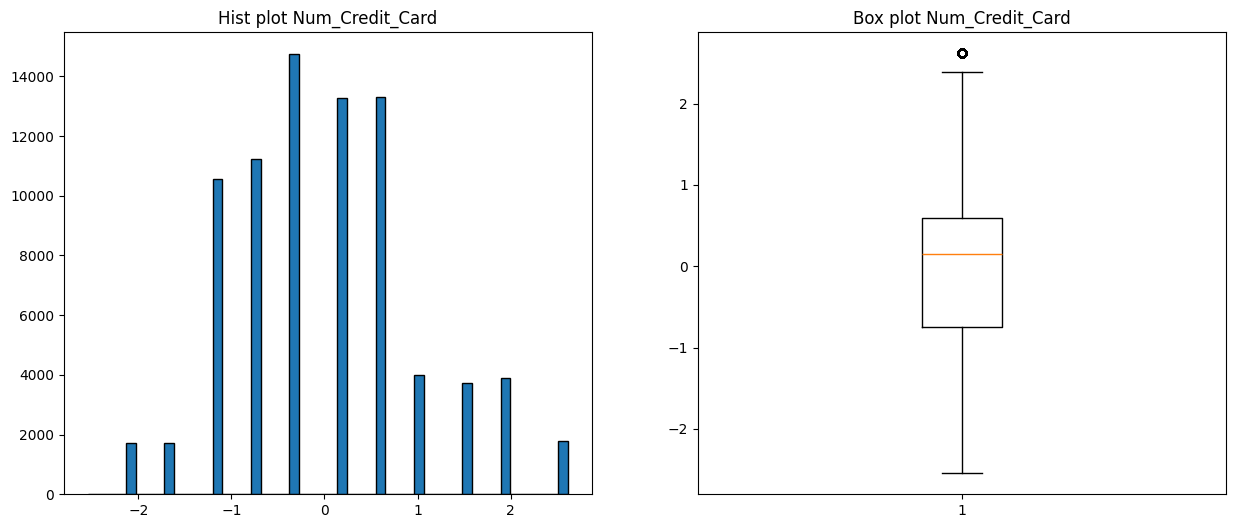

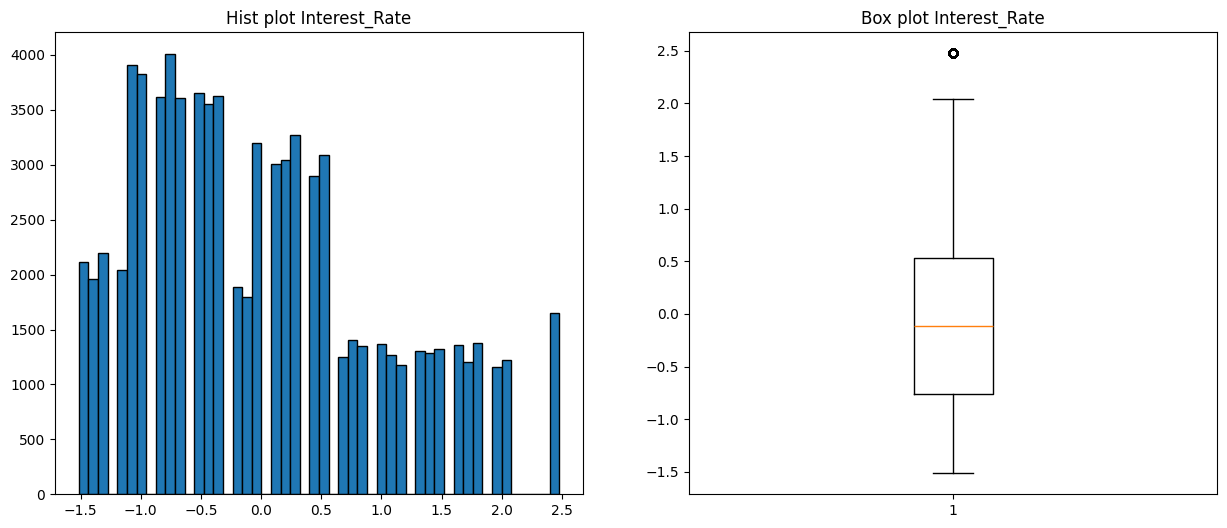

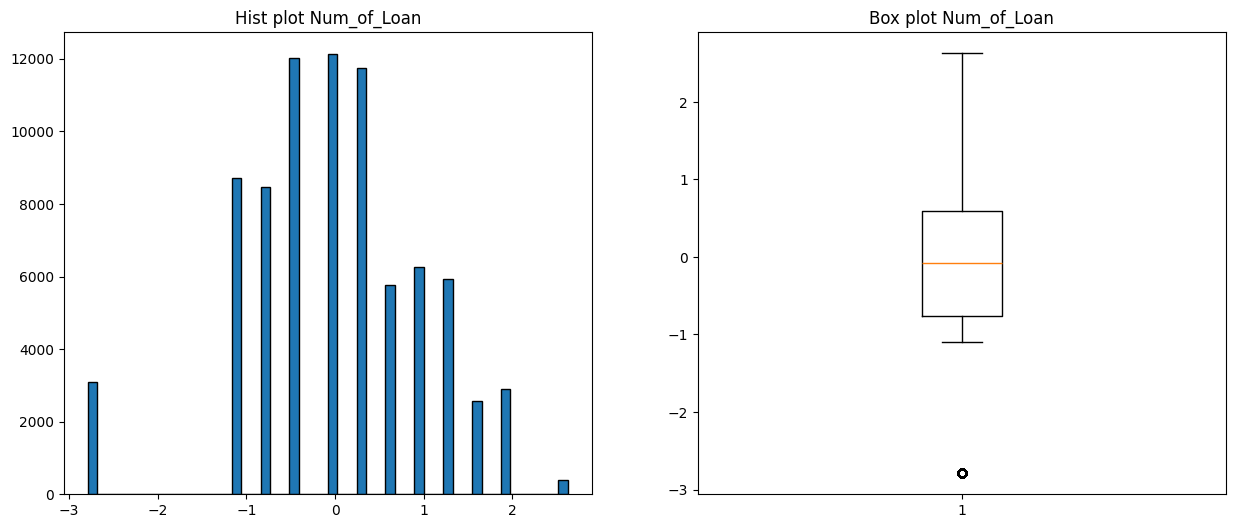

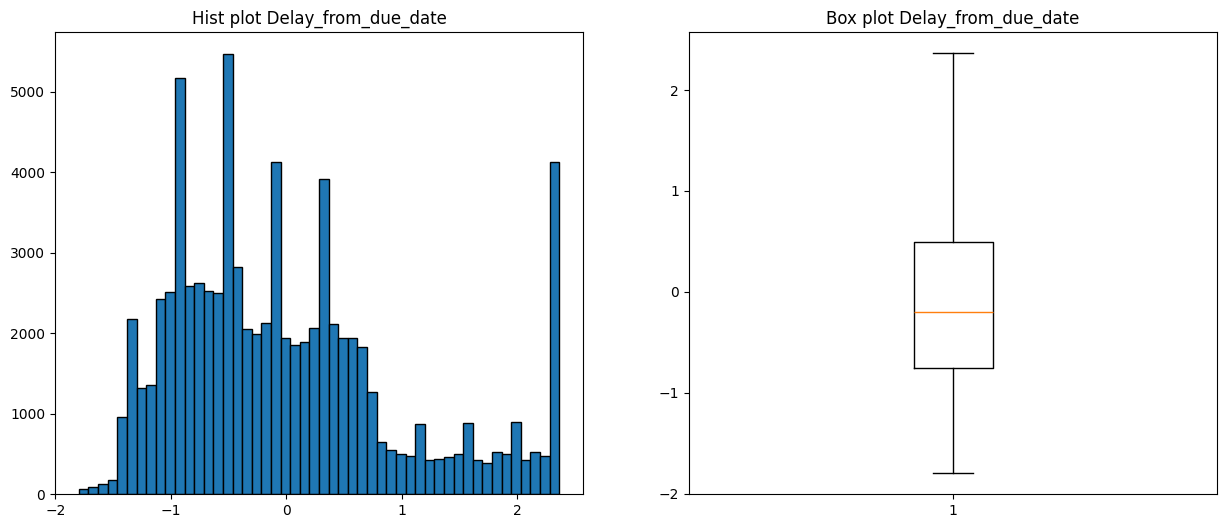

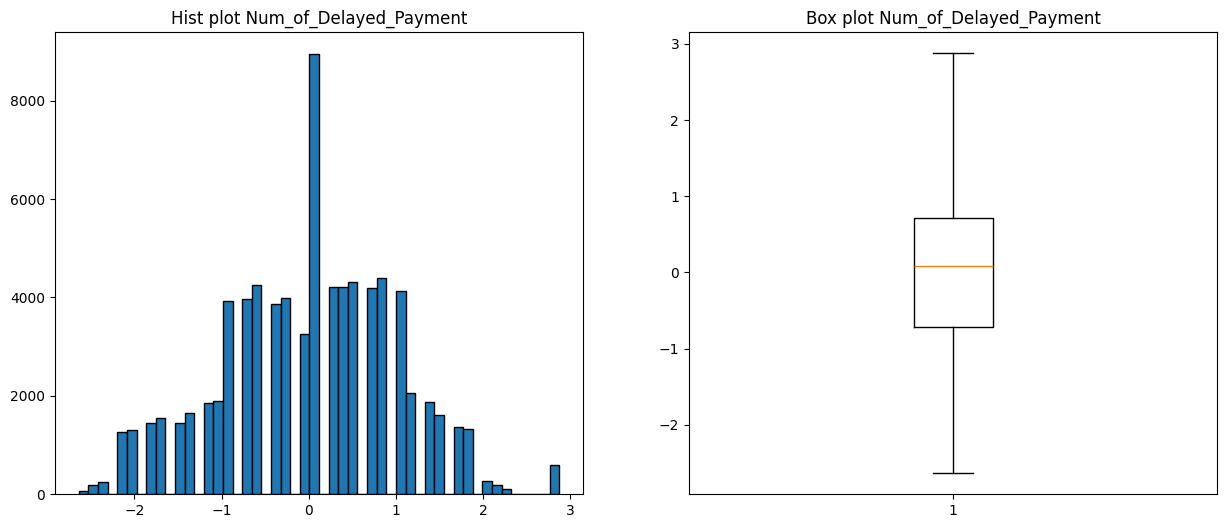

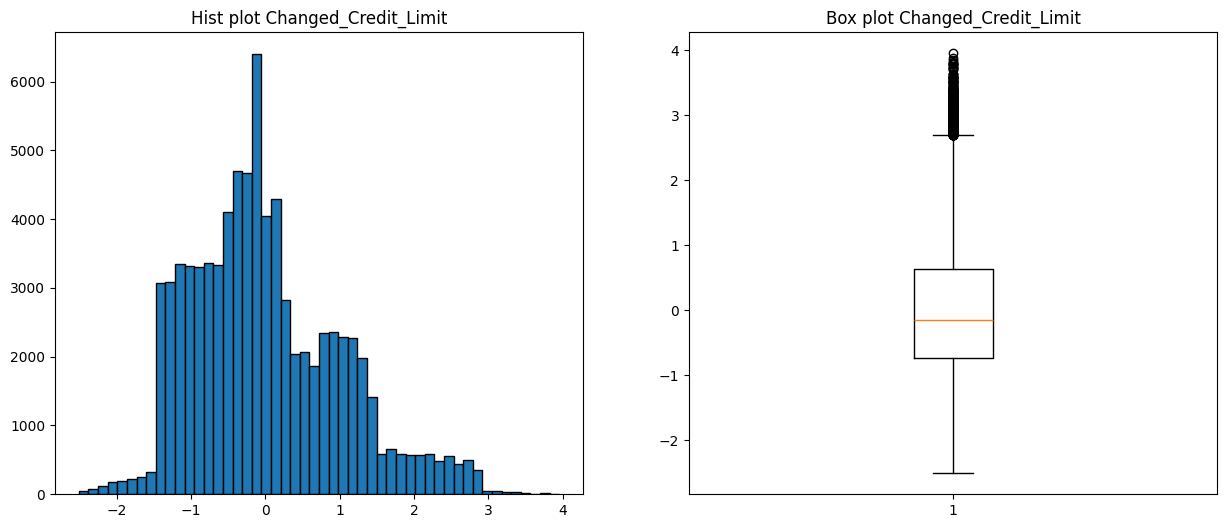

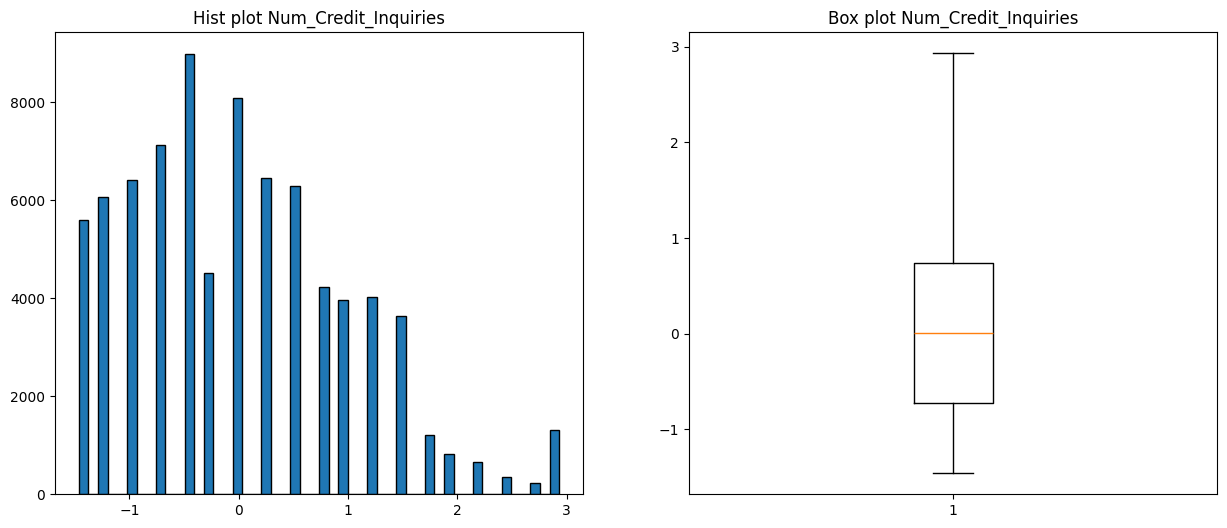

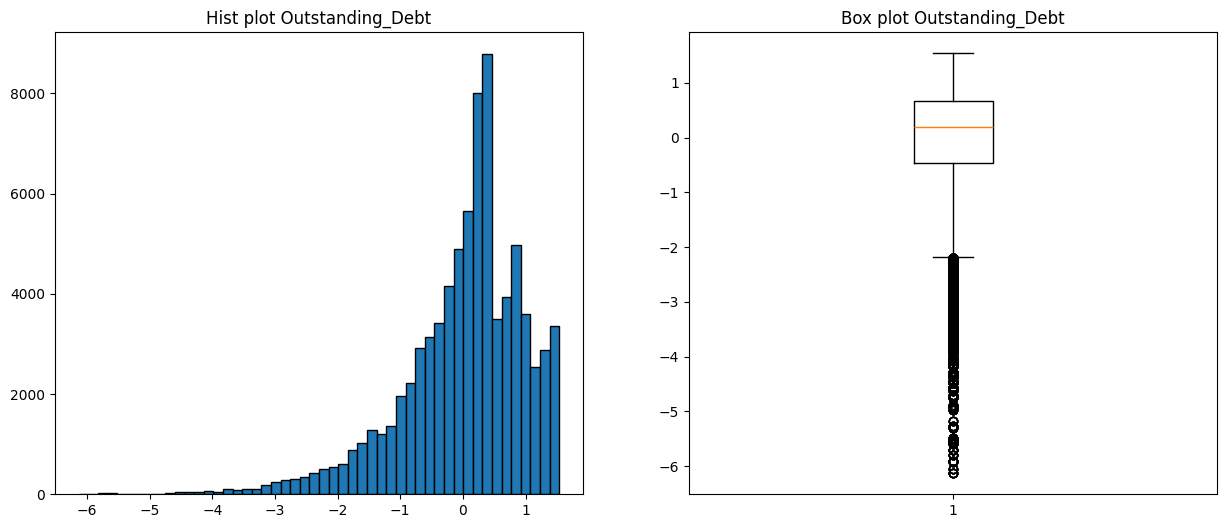

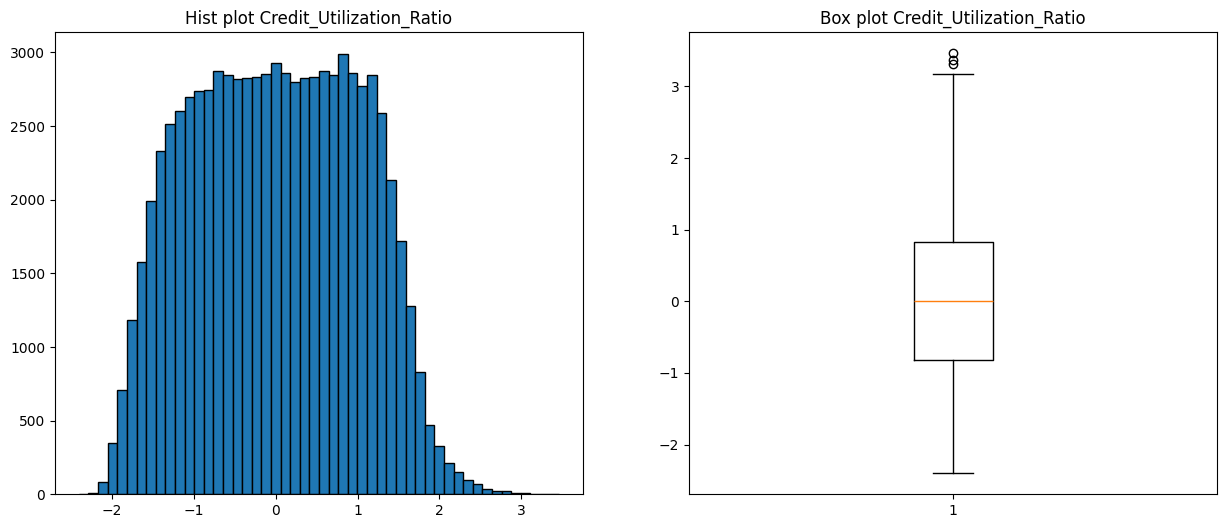

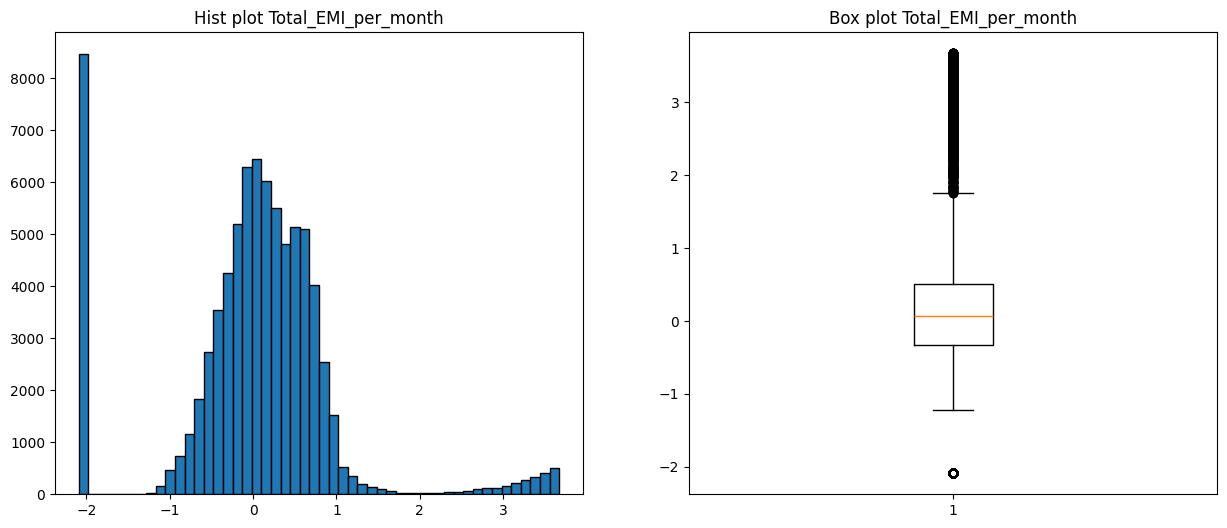

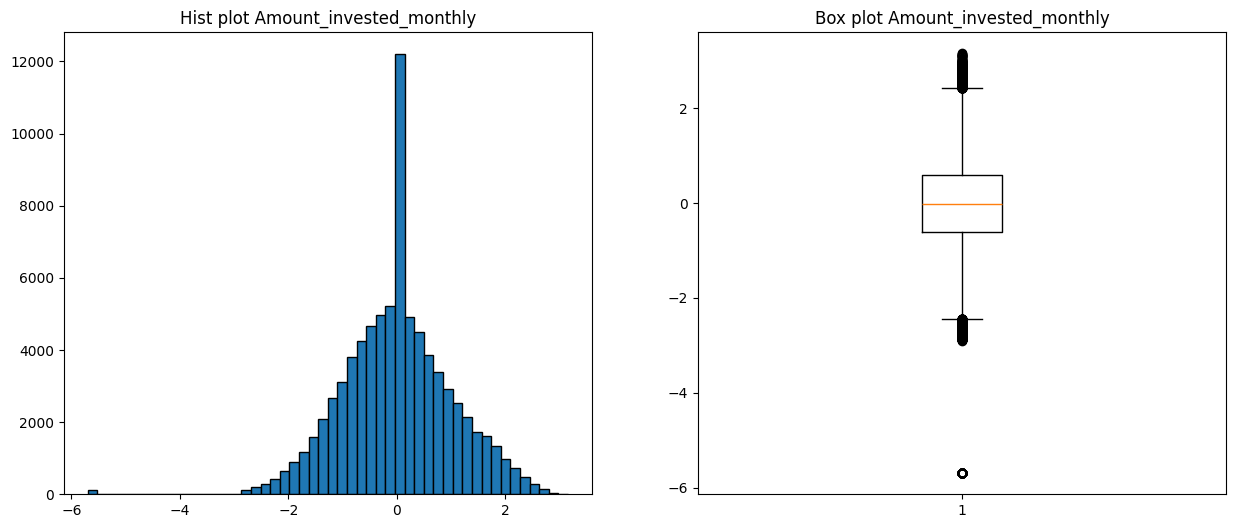

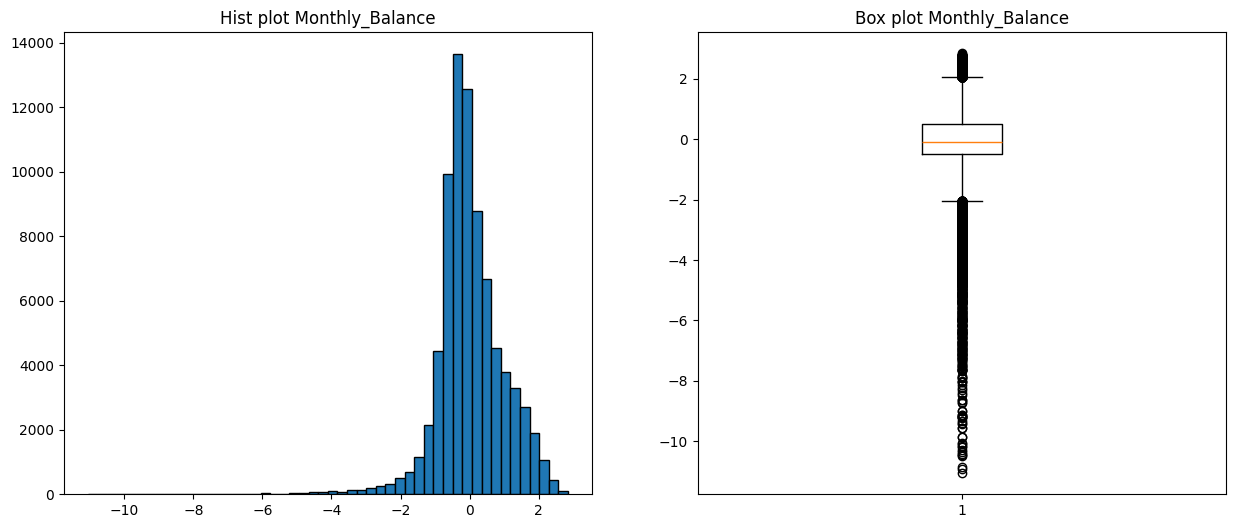

In [50]:
# hist plot dan box plot data training
visualisasi_hist_box(X_train_scaled_df, numeric)

In [51]:
# update kolom supaya Credit_score yang dipisahkan tidak termasuk lagi
category = X.select_dtypes(include=['object']).columns

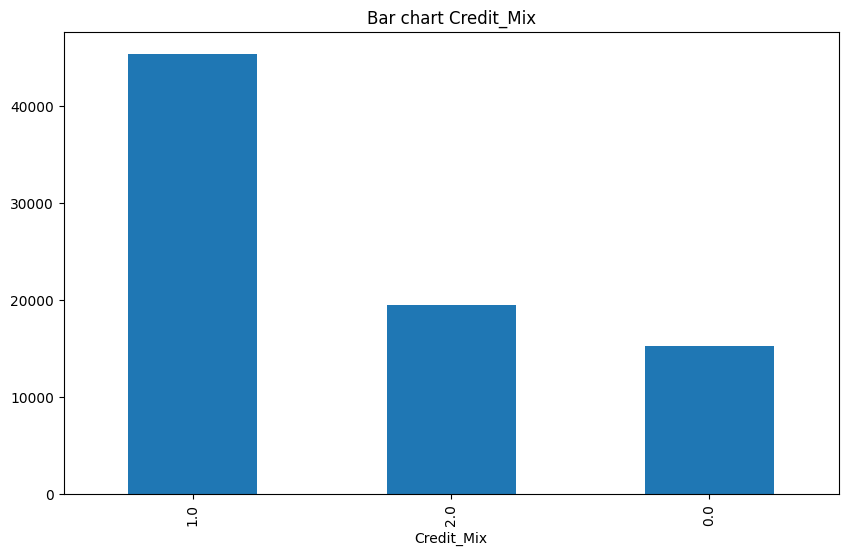

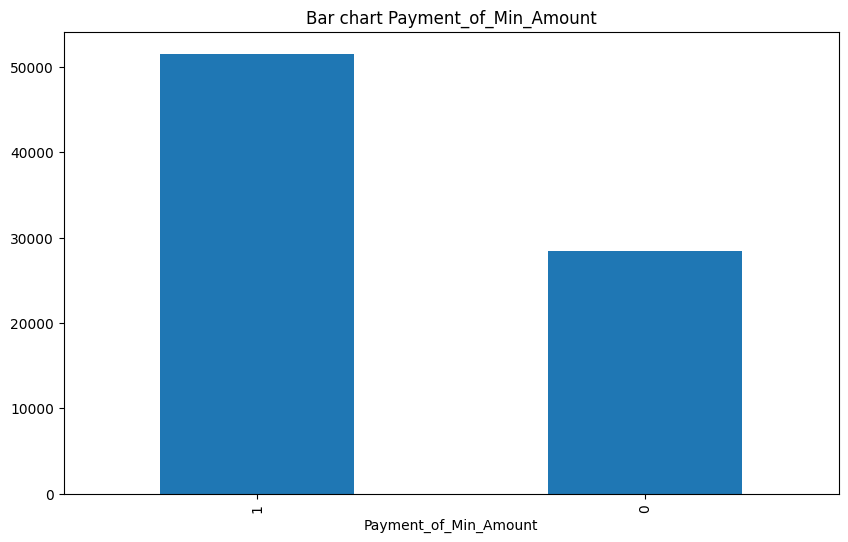

In [52]:
# bar chart data training
visualisasi_bar(X_train_scaled_df, category)

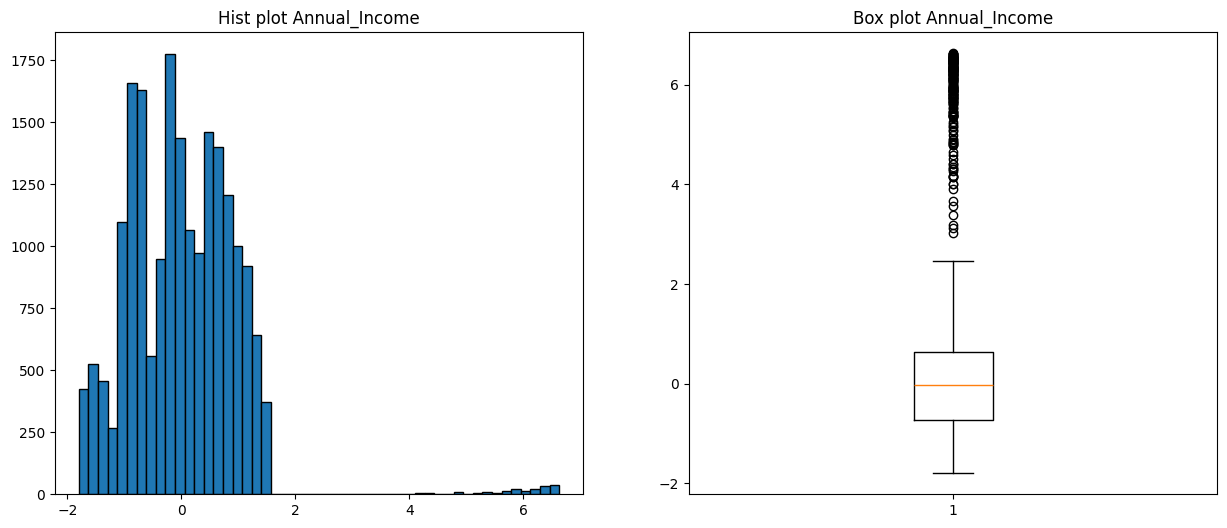

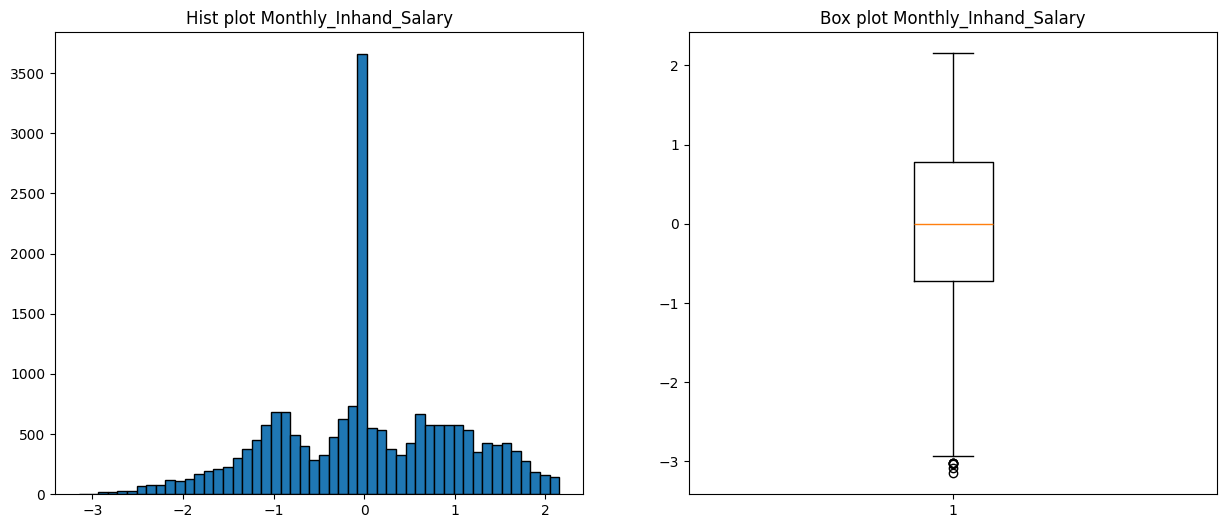

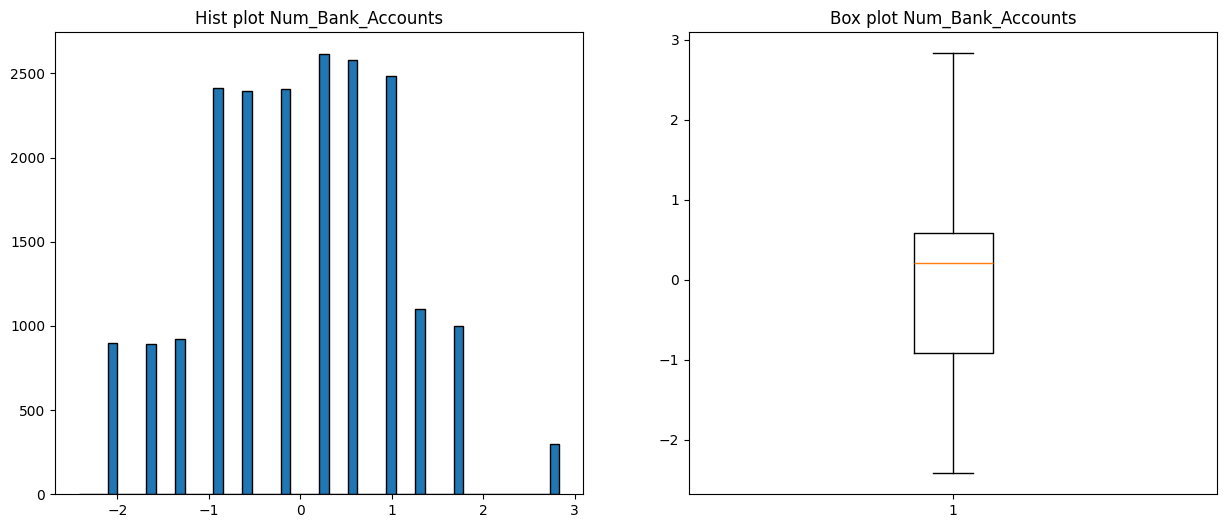

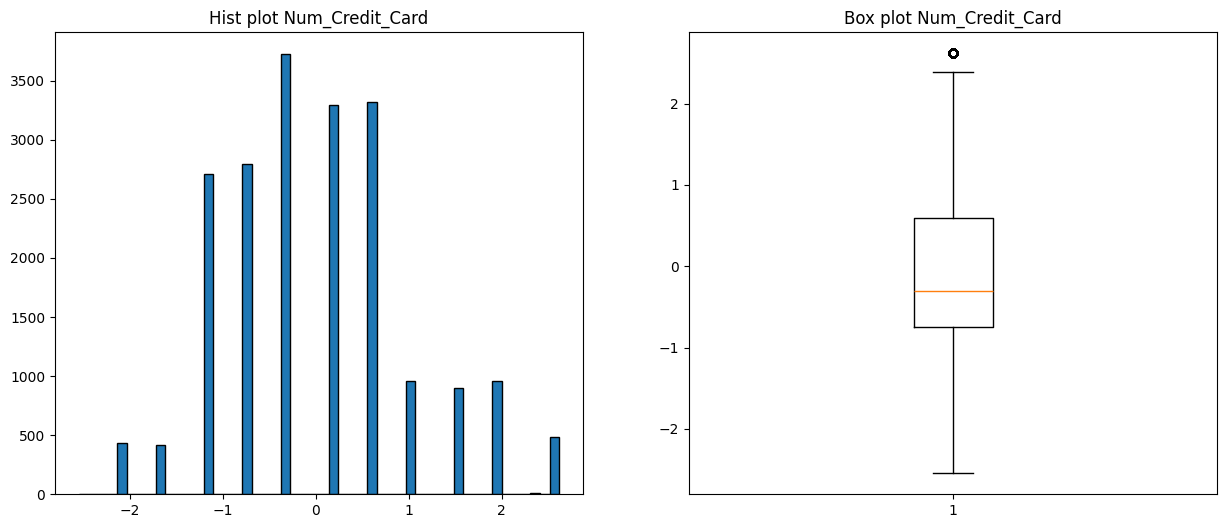

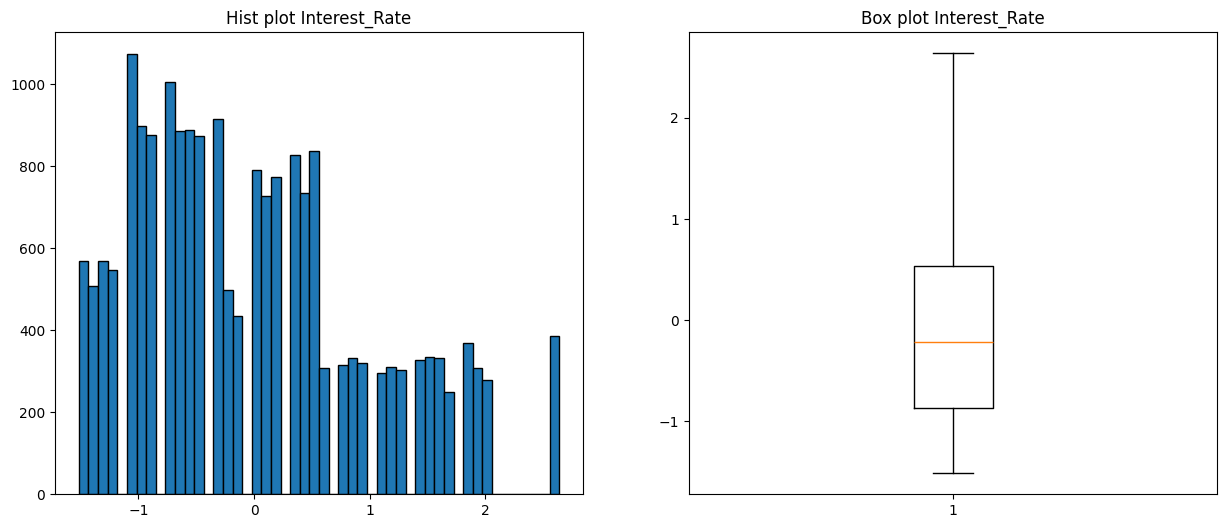

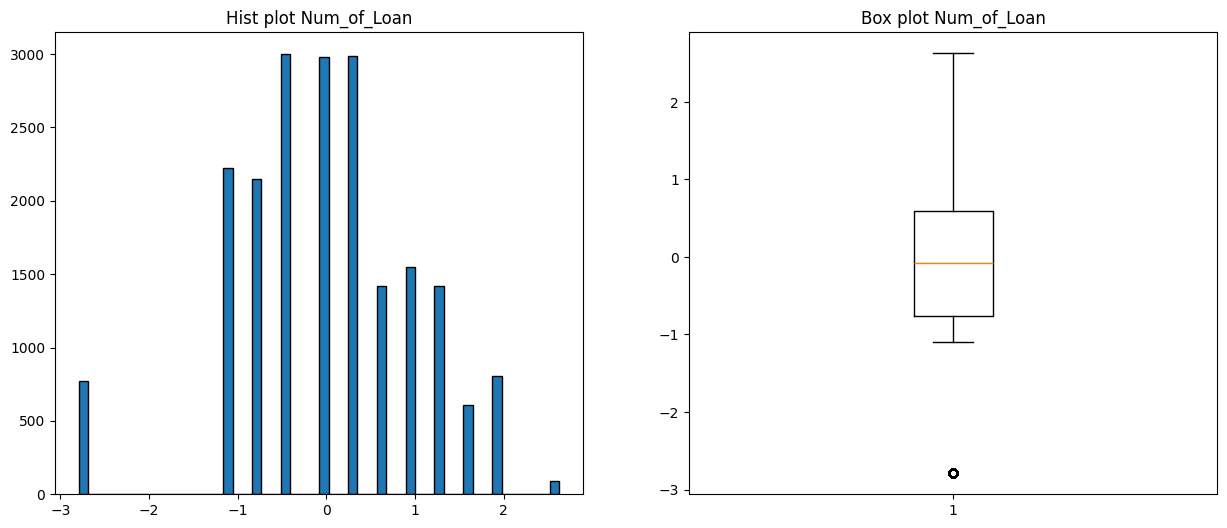

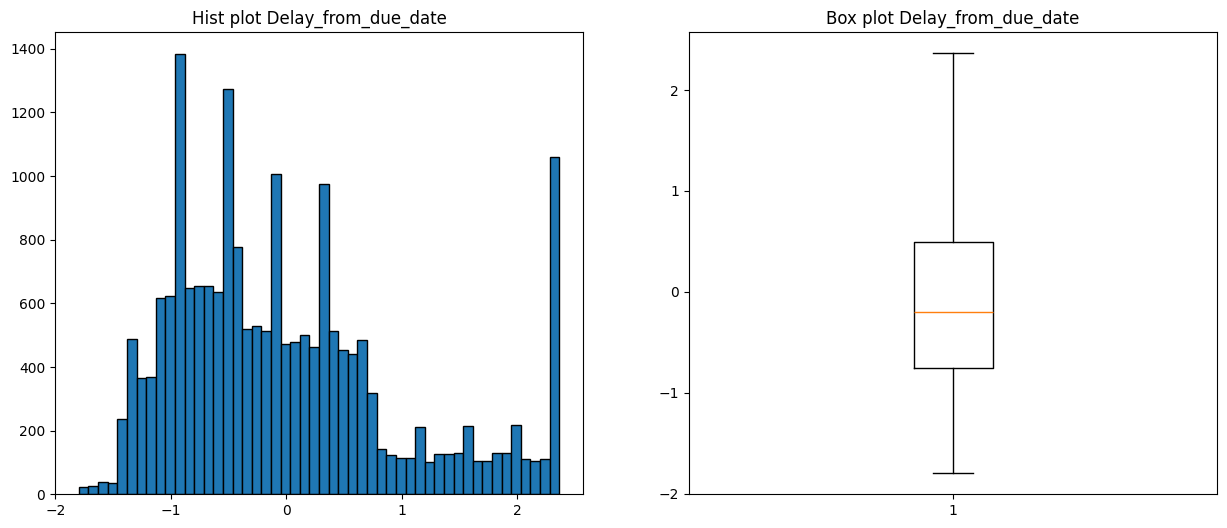

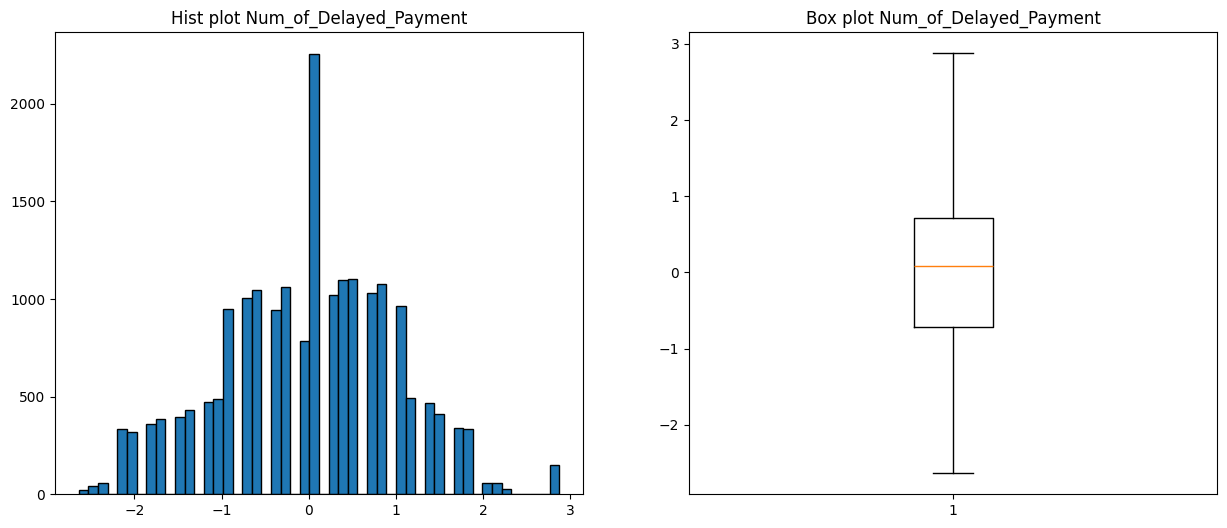

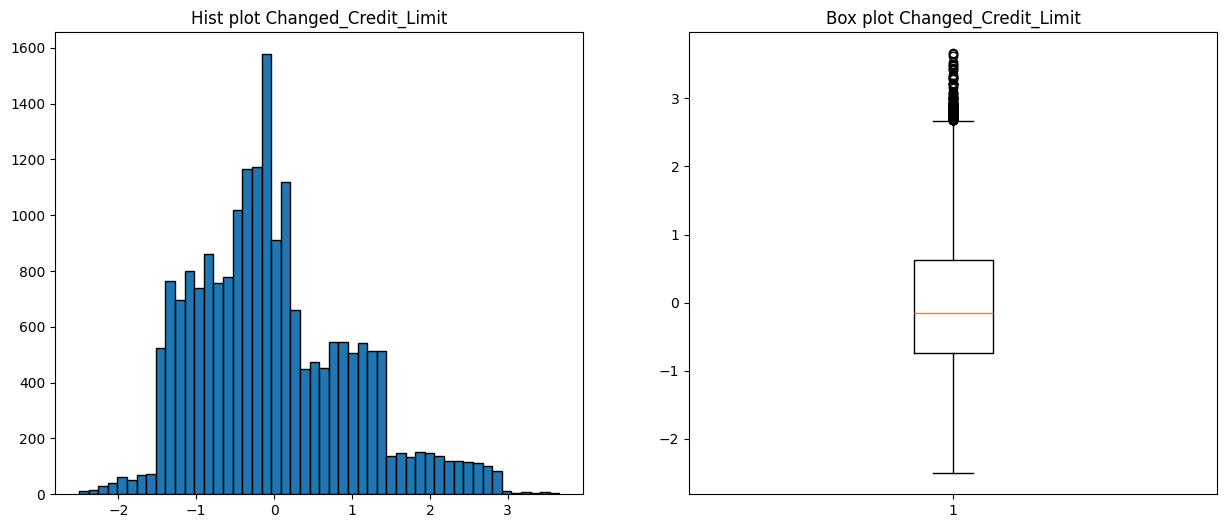

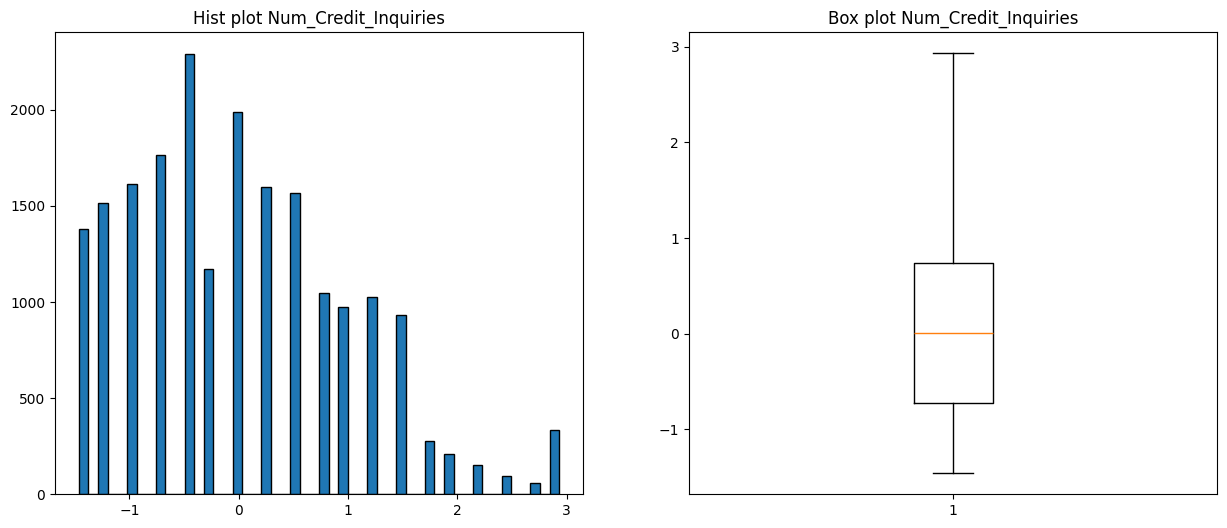

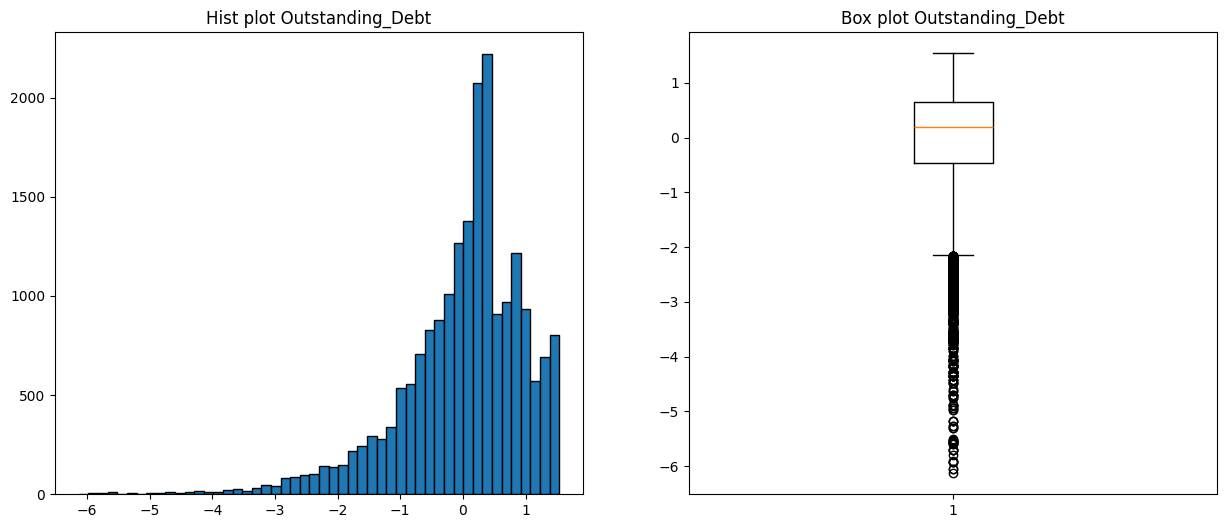

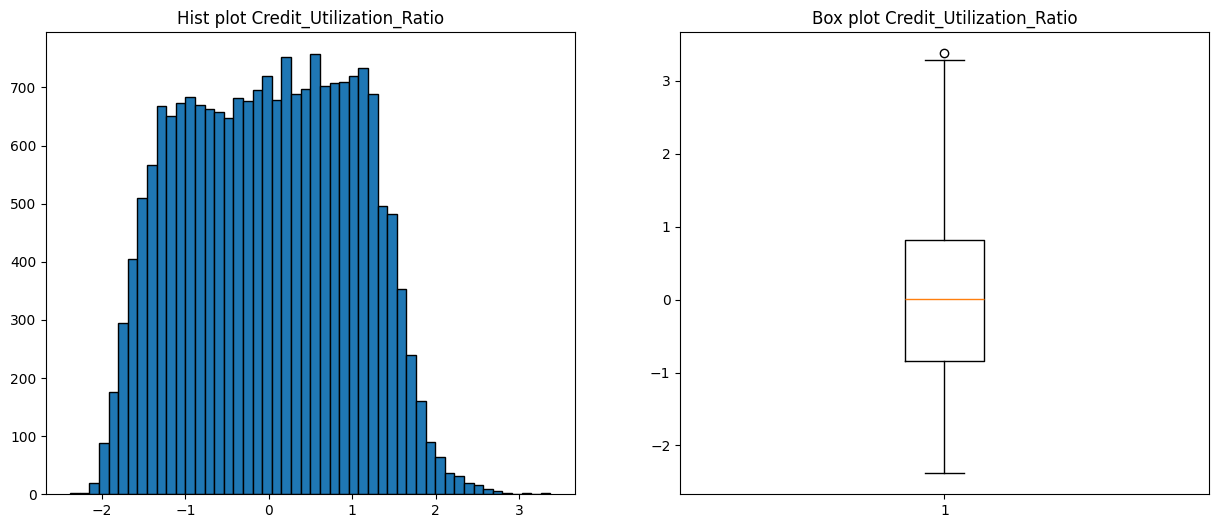

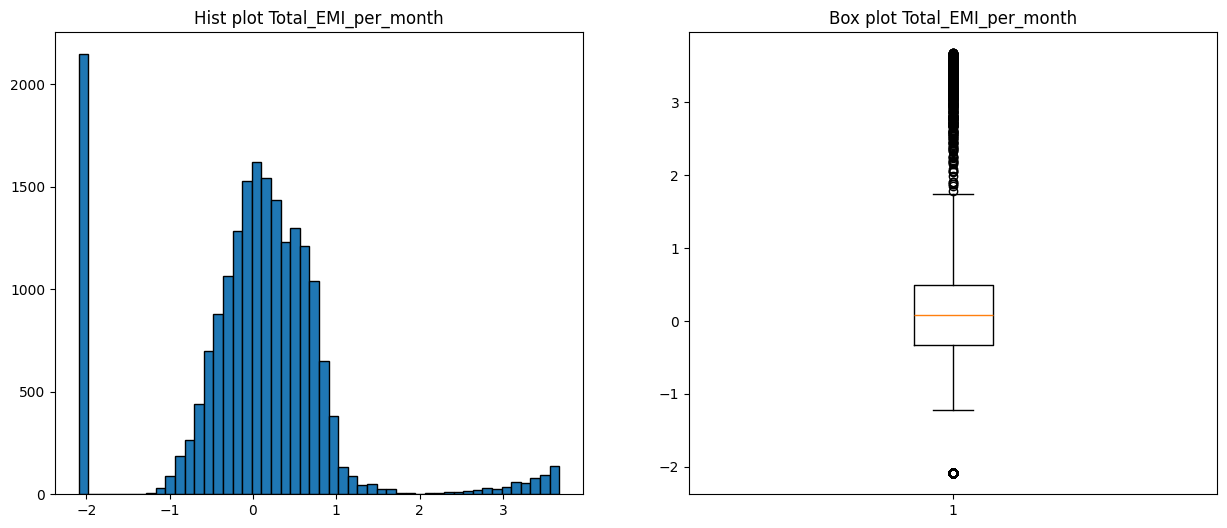

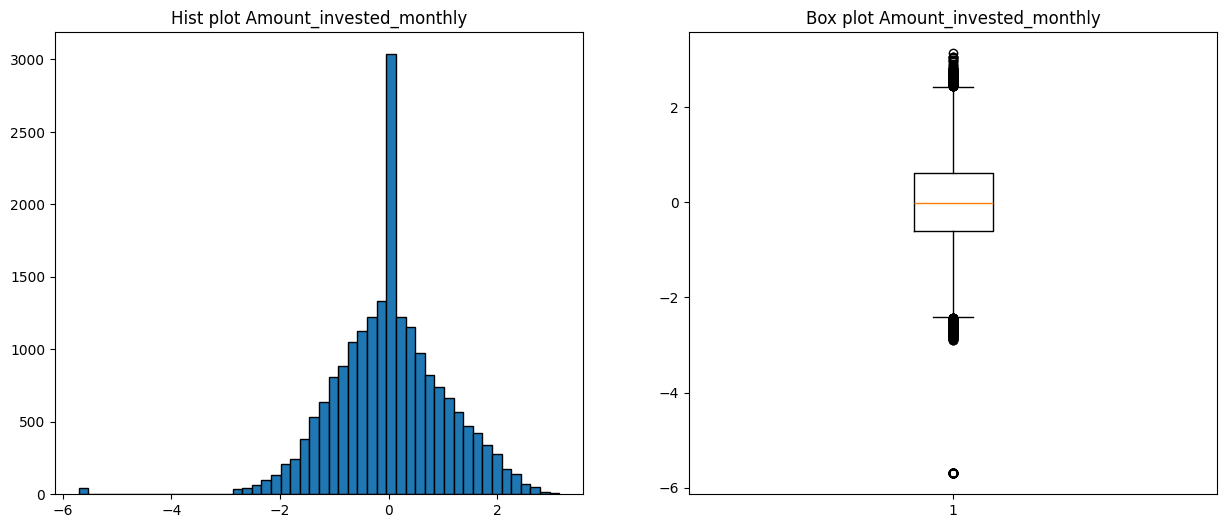

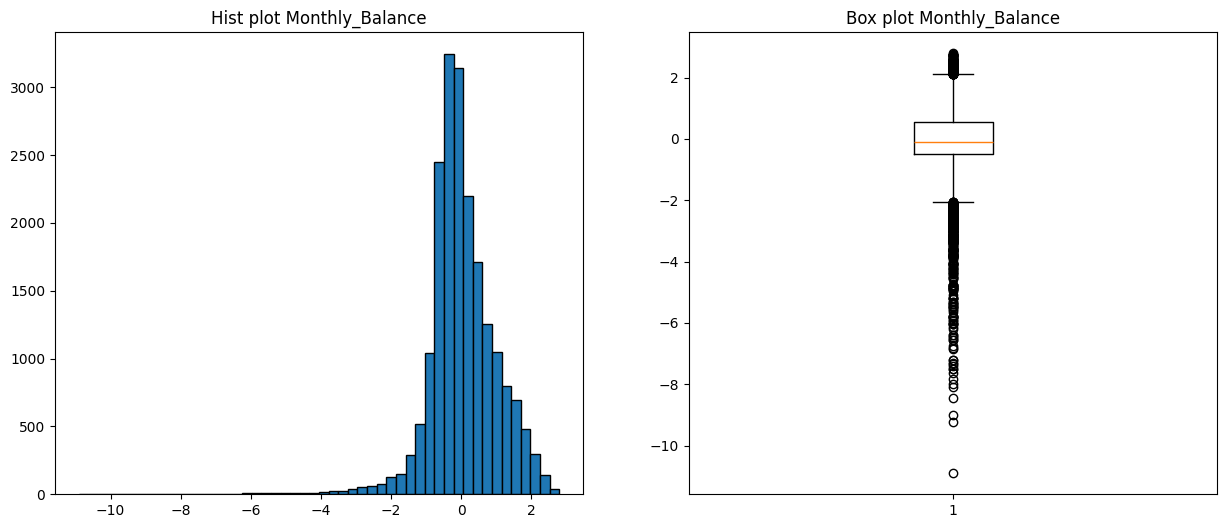

In [53]:
# hist plot dan box plot data validasi
visualisasi_hist_box(X_val_scaled_df, numeric)

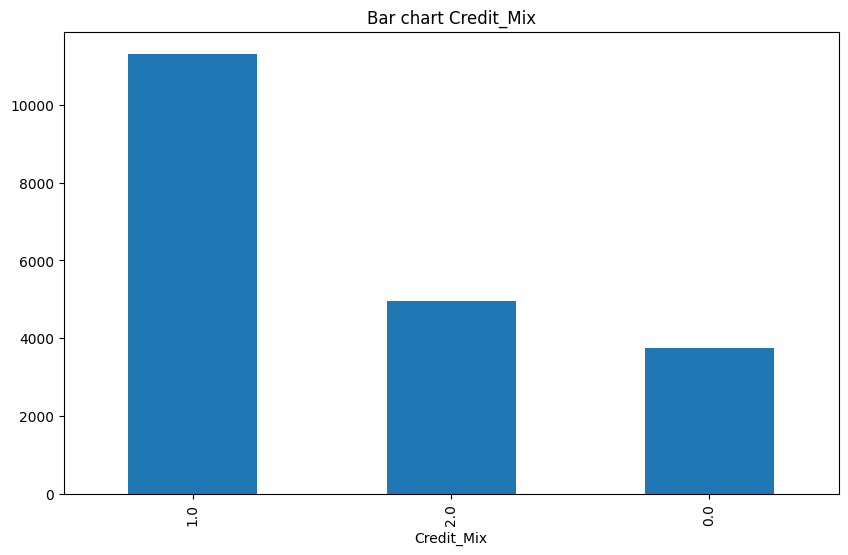

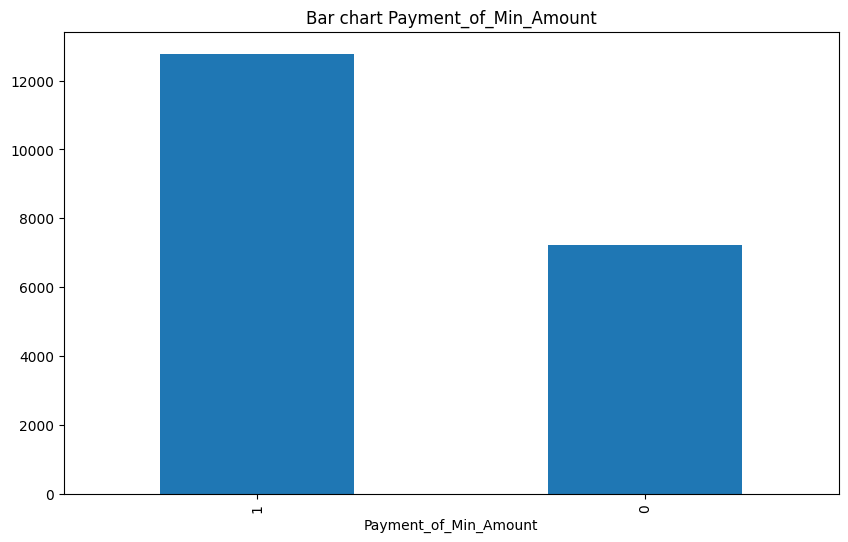

In [54]:
# bar chart data validasi
visualisasi_bar(X_val_scaled_df, category)

Disini saya berpikir sebentar, apakah kolom kategori yang di encode juga terkena standardisasi itu tidak apa apa? Setelah riset sedikit, saya mendapat jika kategori itu berurutan, maka tidak apa apa. Jadi saya simpan saja seperti itu. Setengah juga karena agak malas

# Modelling

Pertama dibuat model basic supaya menjadi perbandingan

In [55]:
# fungsi untuk mengambil semua metrik penilaian
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    results = {
        'Accuracy': accuracy_score(y_val, y_pred),
        'Precision': precision_score(y_val, y_pred, average='weighted'),
        'Recall': recall_score(y_val, y_pred, average='weighted'),
        'F1-Score': f1_score(y_val, y_pred, average='weighted')
    }
    return results

## KNN

In [56]:
# persiapkan model basic
knn_basic = KNeighborsClassifier()

In [57]:
# mulai training
knn_basic.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [58]:
# cek hasil training basic
knn_basic_results = evaluate_model(knn_basic, X_val_scaled, y_val)

## Decision Tree

In [59]:
# buat dan training model basic
dt_basic = DecisionTreeClassifier()
dt_basic.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [60]:
# ambil hasil
dt_basic_results = evaluate_model(dt_basic, X_val_scaled, y_val)

## Random Forest

In [61]:
rf_basic = RandomForestClassifier()
rf_basic.fit(X_train_scaled, y_train)
rf_basic_results = evaluate_model(rf_basic, X_val_scaled, y_val)

## SVM

In [62]:
# svm_basic = SVC()
# svm_basic.fit(X_train_scaled, y_train)
# svm_basic_results = evaluate_model(svm_basic, X_val_scaled, y_val)

Catatan, SVM lamanya minta ampun. Sebagus apapun sepertinya tidak akan bisa di tuning, baik dengan Grid atau Random. Ini 1 model saja sudah 10 menit. Setelah evaluasi, model SVM saya komen karena, ya 10 menit pls

## Perbandingan Model Model

In [63]:
# simpan hasil jadi list supaya bisa di jadikan dataframe nanti
scores = {
    'KNN': knn_basic_results,
    'DT': dt_basic_results,
    'RF': rf_basic_results,
    # 'SVM': svm_basic_results
}

In [64]:
# ubah jadi dataframe
scores_df = pd.DataFrame(scores)

In [65]:
scores_df

,KNN,DT,RF
Accuracy,0.681250,0.685550,0.777400
Precision,0.682494,0.685307,0.777375
Recall,0.681250,0.685550,0.777400
F1-Score,0.681706,0.685422,0.777366


```markdown
               KNN       DT       RF      SVM
Accuracy  0.681250 0.687700 0.775000 0.686200
Precision 0.682494 0.687499 0.774992 0.690644
Recall    0.681250 0.687700 0.775000 0.686200
F1-Score  0.681706 0.687593 0.774960 0.686347
```


RF menang, jadi selanjutnya akan menggunakan RF untuk tuning

# Feature Engineering

## Feature Selection

Disini ada 2 jalur, bisa membuang kolom yang korelasi (kolerasi?) tinggi, atau bisa membuang kolom yang kurang penting menurut random forest. Saya memilih untuk melakukan keduanya, dengan pertama membuang kolom kurang penting menurut random forest, baru analisis dan buang kolom korelasi tinggi

In [66]:
# ambil feature importance dari random forest
feature_importances = rf_basic.feature_importances_

In [67]:
# buat jadi dataframe, lalu sort tinggi ke rendah
feature_importances_df = pd.DataFrame({'feature': X_train_scaled.columns, 'important': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='important', ascending=False)

In [68]:
feature_importances_df

,feature,important
11,Outstanding_Debt,0.134890
4,Interest_Rate,0.092673
8,Changed_Credit_Limit,0.071904
6,Delay_from_due_date,0.070158
16,Monthly_Balance,0.062712
12,Credit_Utilization_Ratio,0.061820
15,Amount_invested_monthly,0.061687
10,Credit_Mix,0.061480
14,Total_EMI_per_month,0.053556
0,Annual_Income,0.053407


In [69]:
# menentukan kolom yang mana yang akan di drop
drop = feature_importances_df[feature_importances_df['important'] < 0.045]['feature']

In [70]:
# drop colom tersebut
X_train_engineered = X_train_scaled.copy() # buat copy supaya yang masih utuh tidak hilang
X_val_engineered = X_val_scaled.copy()
X_train_engineered.drop(columns=drop, inplace=True)
X_val_engineered.drop(columns=drop, inplace=True)

In [71]:
# ambil correlation dari feature tersisa
correlation = X_train_engineered.corr()

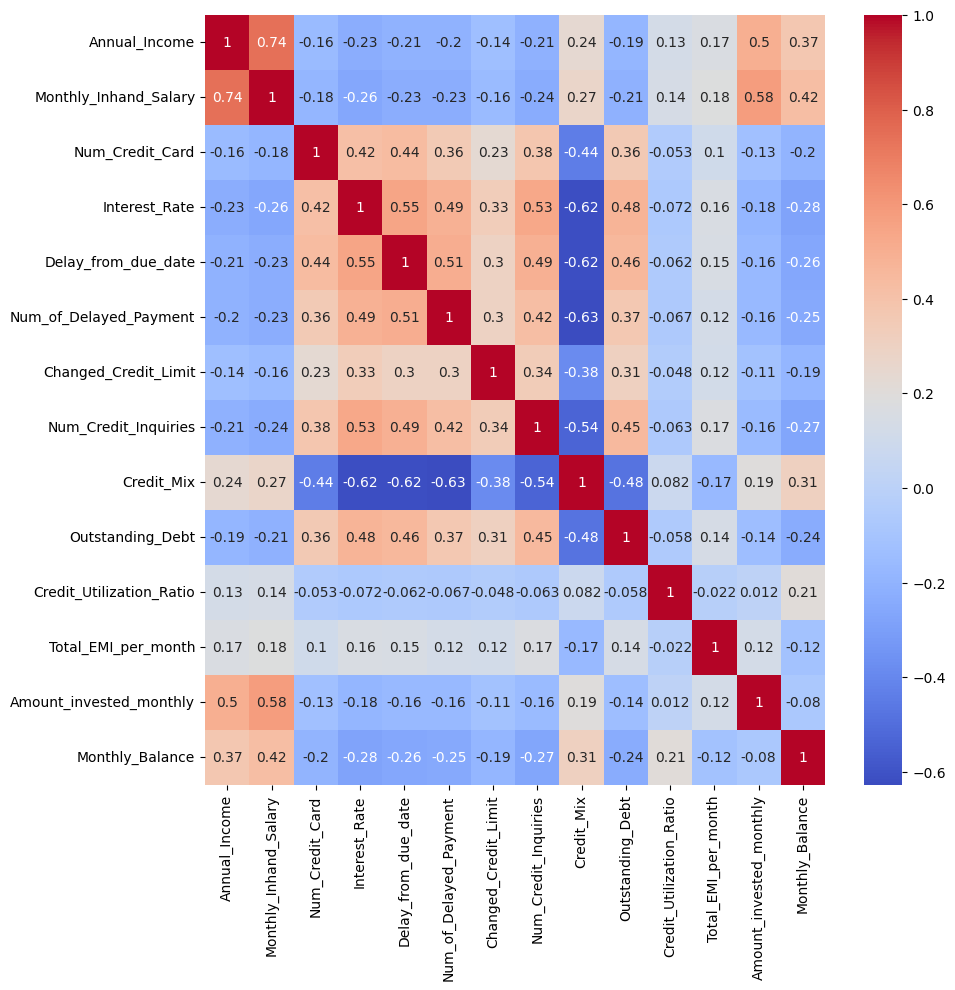

In [72]:
# buat jadi heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

Feature yang berkorelasi diatas 0.7 itu sangat berkolerasi, berarti tidak ada feature yang korelasi tinggi

## Menerapkan ke Model

In [73]:
# latih ulang model random forest basic
rf_engineered = RandomForestClassifier()
rf_engineered.fit(X_train_engineered, y_train)

RandomForestClassifier()

In [74]:
# evaluasi
rf_engineered_results = evaluate_model(rf_engineered, X_val_engineered, y_val)
rf_engineered_results

{'Accuracy': 0.76795,
 'Precision': 0.7674323523127475,
 'Recall': 0.76795,
 'F1-Score': 0.7676478567598046}

Karena hasil akhir nya malah lebih buruk daripada model awal dengan semua fitur, saya memutuskan untuk memotong feature engineering disini, dan lanjut ke hyperparameter tuning

## Hyperparameter Tuning

Pertama saya ingin mengetes dengan parameter yang saya dapat dari file eksperimen saya (random forest test.ipynb)
https://colab.research.google.com/drive/11TuD12Hr6uAHOa8bL5Ypp7dFaLDiIngF?usp=sharing

In [75]:
# menduplikasi hyperparameter yang didapat sebelumnya
rf_transfer = RandomForestClassifier(
    n_estimators=300,
    min_samples_split=2,
    min_samples_leaf=3,
    max_depth=20,
    random_state=0
)

In [76]:
# latih model
rf_transfer.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=3, n_estimators=300,
                       random_state=0)

In [77]:
# evaluasi
rf_transfer_results = evaluate_model(rf_transfer, X_val_scaled, y_val)
rf_transfer_results

{'Accuracy': 0.76065,
 'Precision': 0.7615610240110716,
 'Recall': 0.76065,
 'F1-Score': 0.7610168056497107}

Karena terlihat parameter dari file eksperimen tidak bagus, kita mulai tuning sendiri. Rencananya untuk mencari hyperparameter dengan random search, kemudian baru lebih spesifik dengan grid search

In [78]:
# buat daftar parameter untuk random search
param_list_random = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 4, 8, 16],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

Random Search ini sudah menghasilkan parameter terbaik, jadi dijadikan komen supaya tidak membuang waktu saja

In [79]:
# mulai random search dengan model basic
# random_search = RandomizedSearchCV(
#     rf_basic, param_list_random, n_iter=10, cv=3, scoring='accuracy', verbose=1, n_jobs=-1, random_state=0
# )
# rf_random_search = random_search.fit(X_train_scaled, y_train)

In [80]:
# print('Best Parameters:', random_search.best_params_)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}



In [81]:
# random search 2
param_list_random2 = {
    'n_estimators': [150, 200, 250],
    'max_depth': [None, 5, 10],
    'min_samples_split': [6, 8, 10],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt'],
    'bootstrap': [False]
}
random_search2 = RandomizedSearchCV(
    rf_basic, param_list_random2, n_iter=10, cv=3, scoring='accuracy', verbose=1, n_jobs=-1, random_state=0
)
rf_random_search2 = random_search2.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [82]:
print('Best Parameters:', random_search2.best_params_)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


Best Parameters: {'n_estimators': 200, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}

In [83]:
# buat model hasil random search
rf_random_search = RandomForestClassifier(**random_search2.best_params_)
rf_random_search.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=False, min_samples_leaf=3, min_samples_split=8,
                       n_estimators=200)

In [84]:
# evaluasi
rf_random_search_results = evaluate_model(rf_random_search, X_val_scaled, y_val)
rf_random_search_results

{'Accuracy': 0.78105,
 'Precision': 0.7808069713209181,
 'Recall': 0.78105,
 'F1-Score': 0.7808689750644109}

Hasil akhir Random Search
``` markdown
{'Accuracy': 0.78105,
 'Precision': 0.7808069713209181,
 'Recall': 0.78105,
 'F1-Score': 0.7808689750644109}
```


Melihat hasil hyperparameter tuning yang sangat kecil, saya memutuskan untuk lanjut ke konversi model, karena sudah terlihat bahwa tuning tidak akan membantu

# Konversi

Karena model dari scikit learn, maka akan di convert menjadi joblib

In [85]:
# convert model rf dengan joblib
joblib.dump(rf_random_search, 'model_rf.joblib')

['model_rf.joblib']

In [86]:
# convert semua preprocessing sebelumnya
joblib.dump(standardisasi, 'scaler.joblib')
joblib.dump(credit_mix_encode, 'credit_mix_encoder.joblib')
joblib.dump(payment_encode, 'payment_encoder.joblib')
joblib.dump(credit_score_encode, 'credit_score_encoder.joblib')
joblib.dump(imputer, 'imputer.joblib')

# untuk log transform harus dijadikan transformer dulu karena aslinya hanya rumus numpy
log_transformer = FunctionTransformer(np.log1p, validate=True)
joblib.dump(log_transformer, 'log_transformer.joblib')

['log_transformer.joblib']

# Inference

Di dataset disediakan test dataset, tapi dataset itu tidak memiliki label jadi tidak bisa dipakai untuk menilai akurasi model dengan data baru. Jadi langsung lompat ke data belum pernah dilihat

In [93]:
# import ulang yang tadi di export, tapi nama variabel beda biar tidak konflik
model = joblib.load('model_rf.joblib')
scaler = joblib.load('scaler.joblib')
ordinal_encoder_mix = joblib.load('credit_mix_encoder.joblib')
label_encoder_payment = joblib.load('payment_encoder.joblib')
label_encoder_score = joblib.load('credit_score_encoder.joblib')
imputation_mean = joblib.load('imputer.joblib')
log_transformation = joblib.load('log_transformer.joblib')

In [94]:
# membuat list kolom untuk dipkai di preprocessing
numeric_cols = [
    'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
    'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'
]
categoric_cols = ['Credit_Mix', 'Payment_of_Min_Amount']
log_transform_cols = ['Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

In [95]:
# membuat fungsi buat preprocess data baru
def preprocess_new_data(new_data):
  df = pd.DataFrame([new_data]) # jika input harusnya disimpan dalam dictionary
  df[numeric_cols] = imputation_mean.transform(df[numeric_cols])
  df[log_transform_cols] = log_transformation.transform(df[log_transform_cols])
  df['Credit_Mix'] = ordinal_encoder_mix.transform(df[['Credit_Mix']])
  df['Payment_of_Min_Amount'] = label_encoder_payment.transform(df[['Payment_of_Min_Amount']])
  df[numeric_cols] = scaler.transform(df[numeric_cols])
  df = df[model.feature_names_in_]
  return df

In [96]:
# fungsi meminta input user (khusus inference di file colab)
def get_input():
    new_data = {
        # data angka
        'Annual_Income': float(input('Annual Income (dollar): ')),
        'Monthly_Inhand_Salary': float(input('Monthly In-hand Salary (dollar): ')),
        'Num_Bank_Accounts': int(input('Number of Bank Accounts: ')),
        'Num_Credit_Card': int(input('Number of Credit Cards: ')),
        'Interest_Rate': float(input('Interest Rate (dollar): ')),
        'Num_of_Loan': int(input('Number of Loans: ')),
        'Delay_from_due_date': int(input('Delay from Due Date (day): ')),
        'Num_of_Delayed_Payment': int(input('Number of Delayed Payments: ')),
        'Changed_Credit_Limit': float(input('Changed Credit Limit (dollar): ')),
        'Num_Credit_Inquiries': int(input('Number of Credit Inquiries: ')),
        'Outstanding_Debt': float(input('Outstanding Debt (dollar): ')),
        'Credit_Utilization_Ratio': float(input('Credit Utilization Ratio: ')),
        'Total_EMI_per_month': float(input('Total EMI per Month (dollar): ')),
        'Amount_invested_monthly': float(input('Amount Invested Monthly (dollar): ')),
        'Monthly_Balance': float(input('Monthly Balance (dollar): ')),
        # data kategori
        'Credit_Mix': input('Credit Mix (Bad/Standard/Good): '),
        'Payment_of_Min_Amount': input('Payment of Minimum Amount (Yes/No): ')
    }

    return new_data

In [97]:
# inference
new_data = get_input()
preprocessed_data = preprocess_new_data(new_data)
prediction = model.predict(preprocessed_data)
decoded_prediction = label_encoder_score.inverse_transform(prediction)
print('Credit Score:', decoded_prediction[0])

Annual Income (dollar): 19114.12
Monthly In-hand Salary (dollar): 1824.84333333333
Number of Bank Accounts: 3
Number of Credit Cards: 4
Interest Rate (dollar): 3
Number of Loans: 4
Delay from Due Date (day): 3
Number of Delayed Payments: 9
Changed Credit Limit (dollar): 13.27
Number of Credit Inquiries: 4
Outstanding Debt (dollar): 809.98
Credit Utilization Ratio: 33.0531144970122
Total EMI per Month (dollar): 49.5749492148941
Amount Invested Monthly (dollar): 21.4653802646571
Monthly Balance (dollar): 361.444003853781
Credit Mix (Bad/Standard/Good): Good
Payment of Minimum Amount (Yes/No): No
Credit Score: Good


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
